In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            classification_report, RocCurveDisplay)

In [7]:
data = pd.read_csv(r"C:\Users\stiev\NBA_Project\Data\data.csv")

In [8]:
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [9]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [11]:
data.shape

(30697, 25)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
game_event_id,30697.0,2.491908e+02,1.500037e+02,2.000000e+00,1.100000e+02,2.530000e+02,3.680000e+02,6.590000e+02
game_id,30697.0,2.476407e+07,7.755175e+06,2.000001e+07,2.050008e+07,2.090035e+07,2.960047e+07,4.990009e+07
lat,30697.0,3.395319e+01,8.779136e-02,3.325330e+01,3.388430e+01,3.397030e+01,3.404030e+01,3.408830e+01
loc_x,30697.0,7.110499e+00,1.101246e+02,-2.500000e+02,-6.800000e+01,0.000000e+00,9.500000e+01,2.480000e+02
loc_y,30697.0,9.110753e+01,8.779136e+01,-4.400000e+01,4.000000e+00,7.400000e+01,1.600000e+02,7.910000e+02
lon,30697.0,-1.182627e+02,1.101246e-01,-1.185198e+02,-1.183378e+02,-1.182698e+02,-1.181748e+02,-1.180218e+02
minutes_remaining,30697.0,4.885624e+00,3.449897e+00,0.000000e+00,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
period,30697.0,2.519432e+00,1.153665e+00,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,7.000000e+00
playoffs,30697.0,1.465616e-01,3.536741e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
seconds_remaining,30697.0,2.836508e+01,1.747895e+01,0.000000e+00,1.300000e+01,2.800000e+01,4.300000e+01,5.900000e+01


In [13]:
data.season.value_counts()

season
2005-06    2318
2008-09    2242
2002-03    2241
2007-08    2153
2009-10    2080
2001-02    2028
2006-07    1887
2000-01    1868
2010-11    1825
2003-04    1638
2011-12    1637
2012-13    1593
1999-00    1577
2004-05    1324
2015-16    1113
1997-98     989
1998-99     921
2014-15     713
1996-97     477
2013-14      73
Name: count, dtype: int64

In [14]:
# dropping the unwanted columns
data.drop(columns=['game_event_id', 'game_id', 'team_id', 'game_date', 'shot_id'], inplace=True)

In [15]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

## DOMAIN ANALYSIS

1. **ACTION TYPE** -  There are several different types of shot that player can take.

2. **COMBINED SHOT TYPE** - Combination of two shots.

3. **GAME EVENT ID** - It will be used to get the game event data.

4. **GAME ID** - It is a unique sequence used to identify your player profile in free to play games.

5. **LAT AND LONG** - Lat and Long will give co-ordinates to the place where game happened.

6. **LOC_X** - X is left-right along the endline with 0 centered at the basket (negative numbers left of the basket if the basket is on the bottom of the chart).

7. **LOC_Y** -  Y is positive towards halfcourt with 0 being at the basket (so very small negative numbers are possible, since the basket hangs just over the baseline).

8. **MINUTES REMAINING** - Minutes left in a given overall time.

9. **PERIOD** - A period in basketball is a block of time that a basketball game is made up of.There are four periods in an NBA game that last 12 minutes each.

10. **PLAYOFFS** - An additional match played to decide the outcome of a contest.

11. **SEASON** - In sports, a season is the part of one year that games of that sport are played.

12. **SECONDS REMAINING** - Seconds left in that minute.

13. **SHOT DISTANCE** - The shot is from the distance of an NBA three pointer (23 ft. 9 in.) Measures a team's point differential per 100 possessions.

14. **SHOT MADE FLAG** - Whether the player took a shot or not.

15. **SHOT TYPE** -  In basketball, a field goal is a basket scored on any shot or tap other than a free throw, worth two or three points depending on the distance of the attempt from the basket.

16. **SHOT ZONE AREA** -  The area of the field where player is able to take the shot at goal.

17. **SHOT ZONE BASIC** - With the use of only one hand, the shot should be released above the height of shoulder.

18. **SHOT ZONE RANGE** - Areas where they are most comfortable and confident in making shots.

19. **TEAM ID** - A TeamID is a unique identifier.

20. **TEAM NAME** - It is the name of a team in which player played for in a particular season.

21. **GAME DATE** - Date on which game happened.

22. **MATCHUP** - A sporting contest between two teams.

23. **OPPONENT** - Team that is competing against another team in a game.

24. **SHOT ID** - It is a unique id given to a particular shot.

# Exploratory Data Analysis

### Univariate analysis

In [16]:
df = data[['lat', 'loc_x', 'loc_y', 'lon',  'minutes_remaining', 'period', 'playoffs', 'seconds_remaining', 'shot_distance']]


In [17]:
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

In [18]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                30697 non-null  float64
 1   loc_x              30697 non-null  int64  
 2   loc_y              30697 non-null  int64  
 3   lon                30697 non-null  float64
 4   minutes_remaining  30697 non-null  int64  
 5   period             30697 non-null  int64  
 6   playoffs           30697 non-null  int64  
 7   seconds_remaining  30697 non-null  int64  
 8   shot_distance      30697 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 2.1 MB


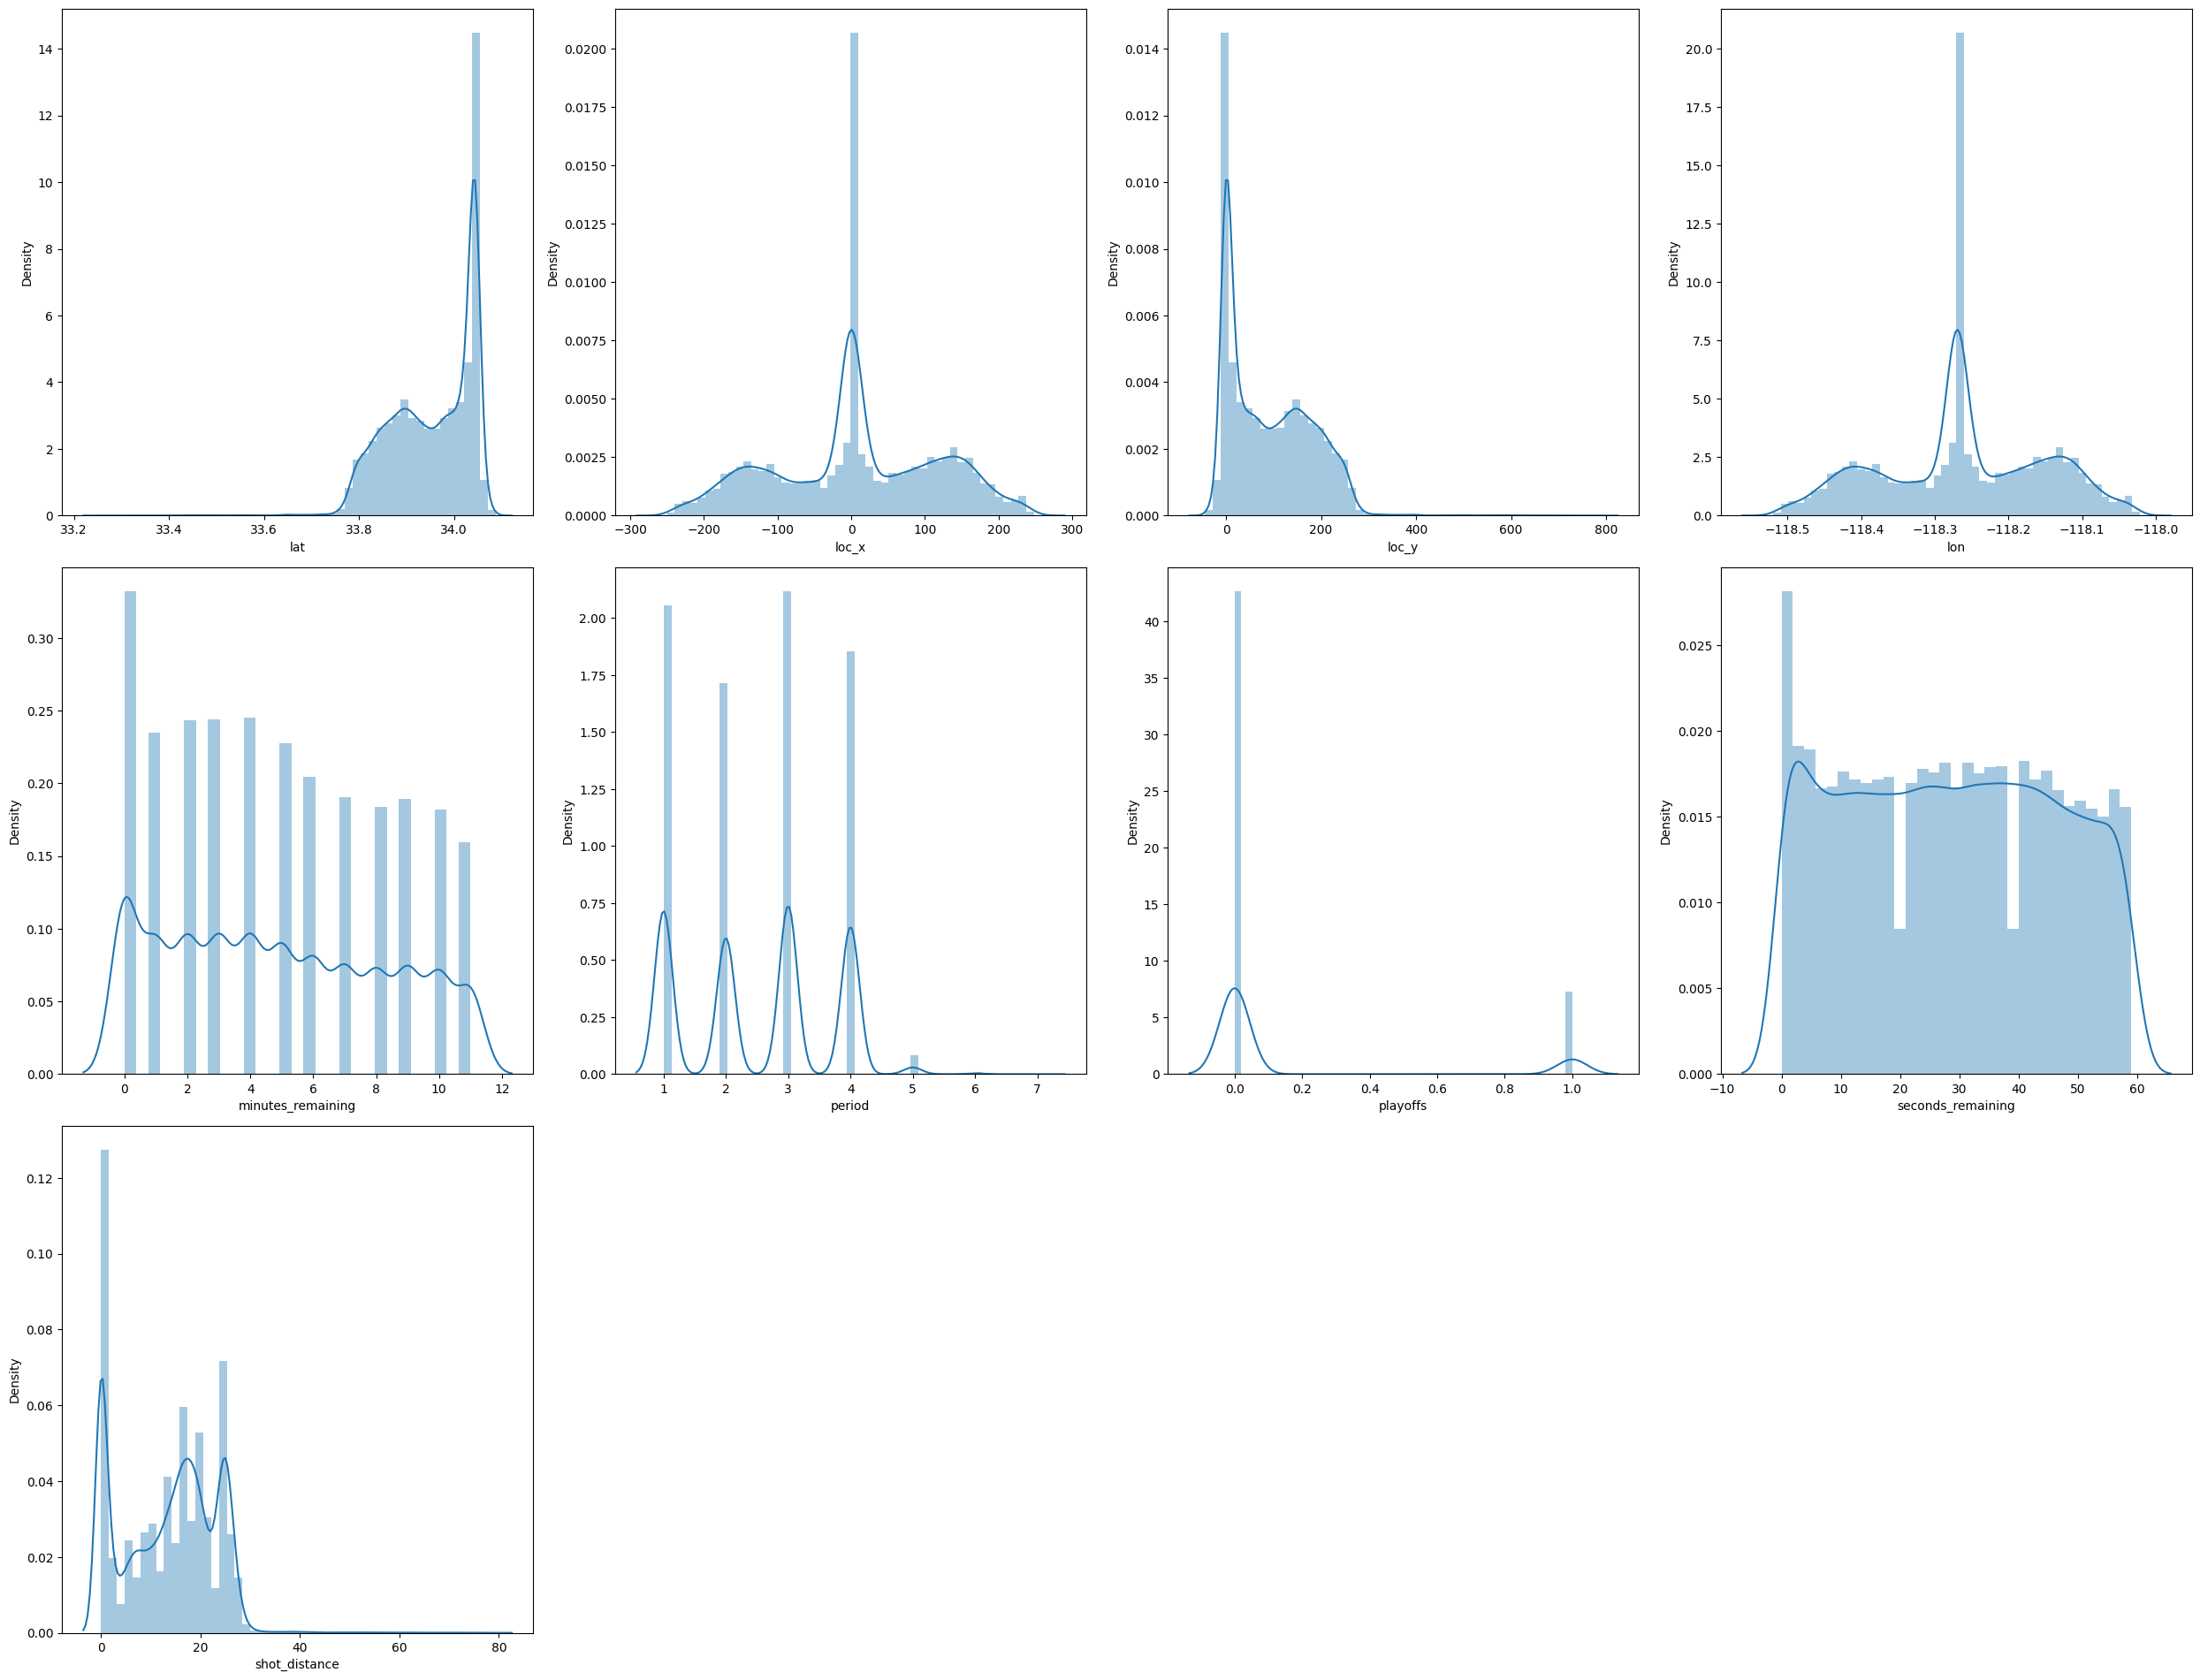

In [20]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in df:
    if(plotnum<25):
        ax=plt.subplot(4,4,plotnum)
        sns.distplot(df[c])
    plotnum+=1
plt.tight_layout()    
plt.show()

1. *last column* is having left skewed distribution
2. *loc_x column* is having normal distribution
3. *loc_y column* is having right skewed distribution
4. *lon column* is having normal distribution

In [21]:
data.lat.skew()

-0.8156970849380396

In [22]:
data.loc_x.skew()

-0.08507777769019095

In [23]:
data.loc_y.skew()

0.8156970849377837

In [24]:
data.lon.skew()

-0.0850777776902798

In [25]:
data.minutes_remaining.skew()

0.19855551130476576

In [26]:
data.period.skew()

0.0547268867443441

In [27]:
data.playoffs.skew()

1.998797864677572

In [28]:
data.seconds_remaining.skew()

0.0310051679894428

In [29]:
data.shot_distance.skew()

0.10546304610373619

In [30]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [31]:
cat_columns = data.select_dtypes(include=['object'])
cat_columns

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
0,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
1,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR
2,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
3,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,2000-01,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR
...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,1999-00,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND
30693,Tip Shot,Tip Shot,1999-00,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND
30694,Running Jump Shot,Jump Shot,1999-00,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. IND,IND
30695,Jump Shot,Jump Shot,1999-00,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Los Angeles Lakers,LAL vs. IND,IND


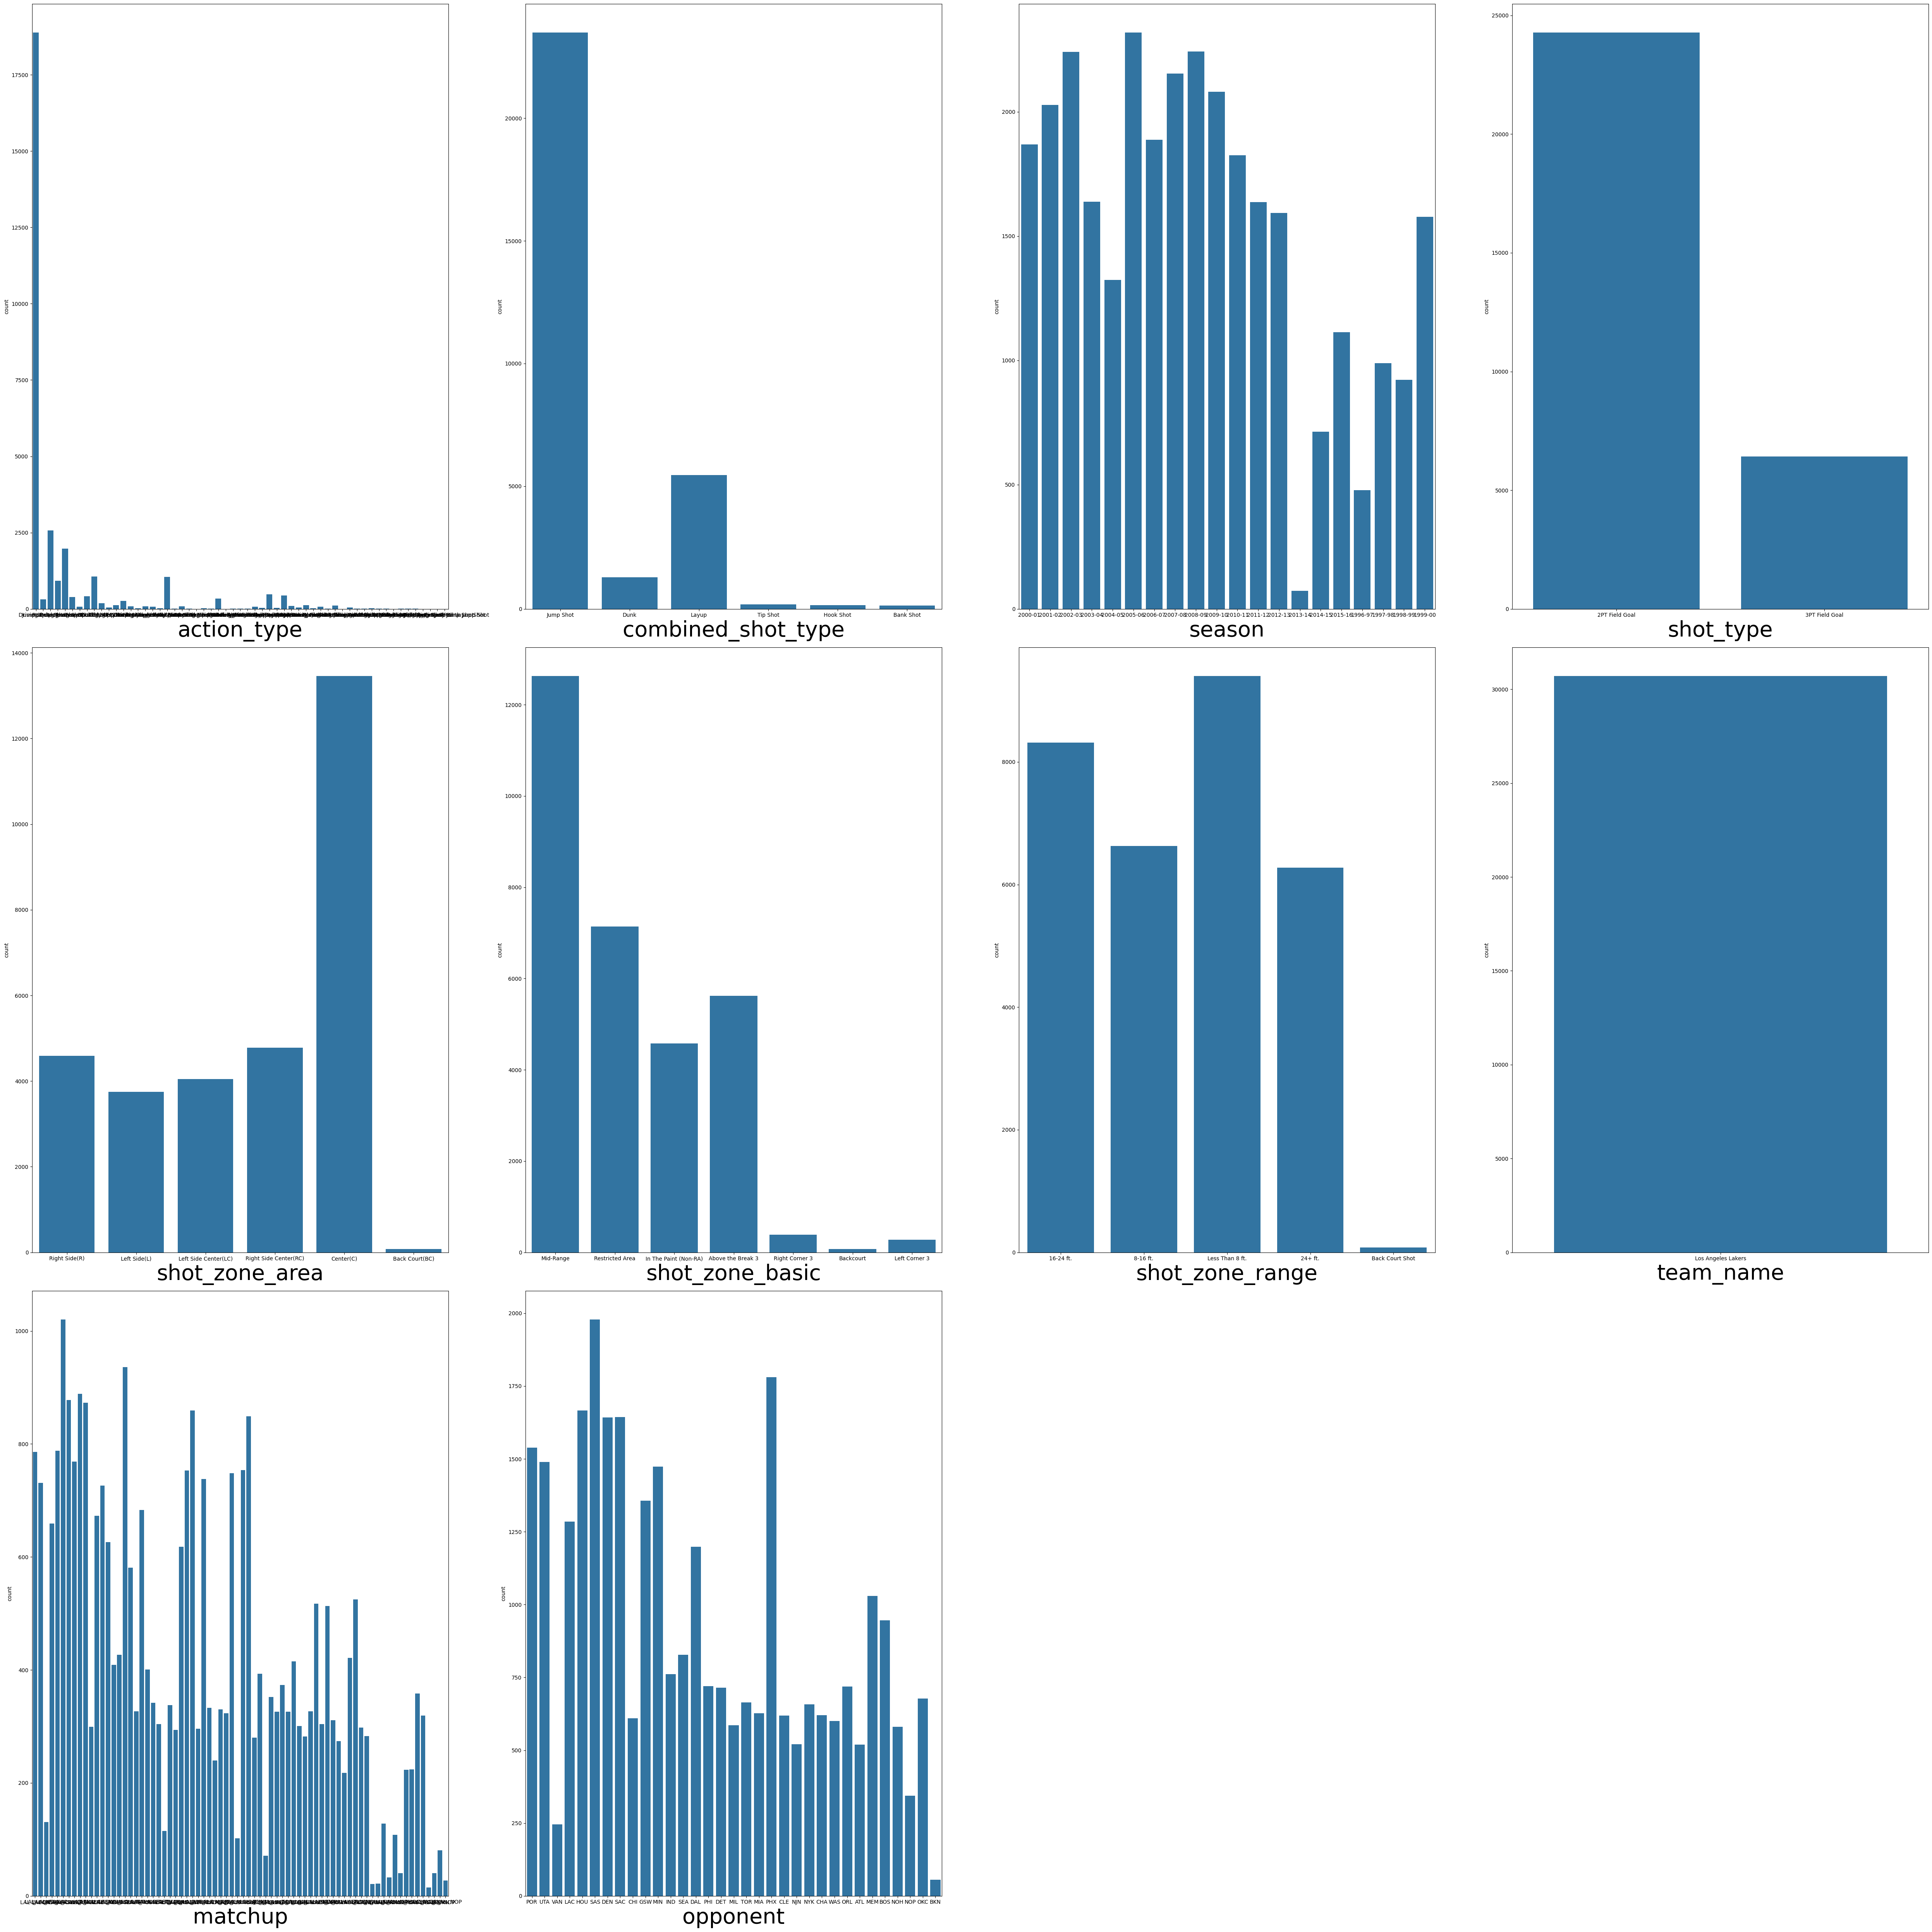

In [32]:
plt.figure(figsize=(50, 50), facecolor='white')
plotnumber = 1

for columns in cat_columns:
    if plotnumber<=11 :
        ax = plt.subplot(3, 4,plotnumber)
        sns.countplot(x=columns,data=cat_columns) 
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

1. In action_type there are more than 18000 times player used jump shot.

2. Player used more than 20000 times jump shot along with combination of other shot.
3. In 2013-14 player made very less attempts for basket

4. Player made 2PT Field Goal majorly.

5. The majority attempts for basket made by the player from the center shot_zone_area.

6. The majority attempts for basket made by the player from the Mid-Range shot_zone_basic.

7.  The majority attempts for basket made by the player less than 8ft.

8. Player played majority of games against SAS.

### Bivariate analysis

##### Analysis of continuous variable with target variable

In [33]:
data.shot_made_flag.unique()

array([nan,  0.,  1.])

In [34]:
data.shape

(30697, 20)

In [35]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

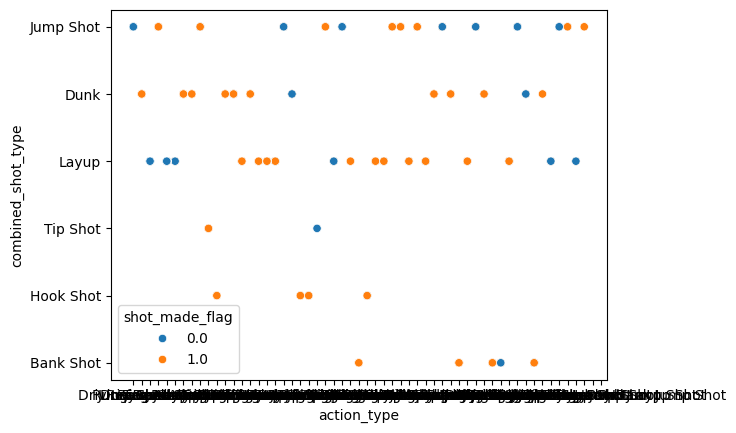

In [36]:
sns.scatterplot(x='action_type',y='combined_shot_type',hue='shot_made_flag',data=data)
plt.show()

1. If Hook shot is attempted then basket is made.

2. If Bank shot is attempted then their is a 80% of basket chance.

3. If Tip shot is attempted then their is a 50% chance of basket.

4. Majority Baskets are taken in Layup, Dunk and Jump shot.

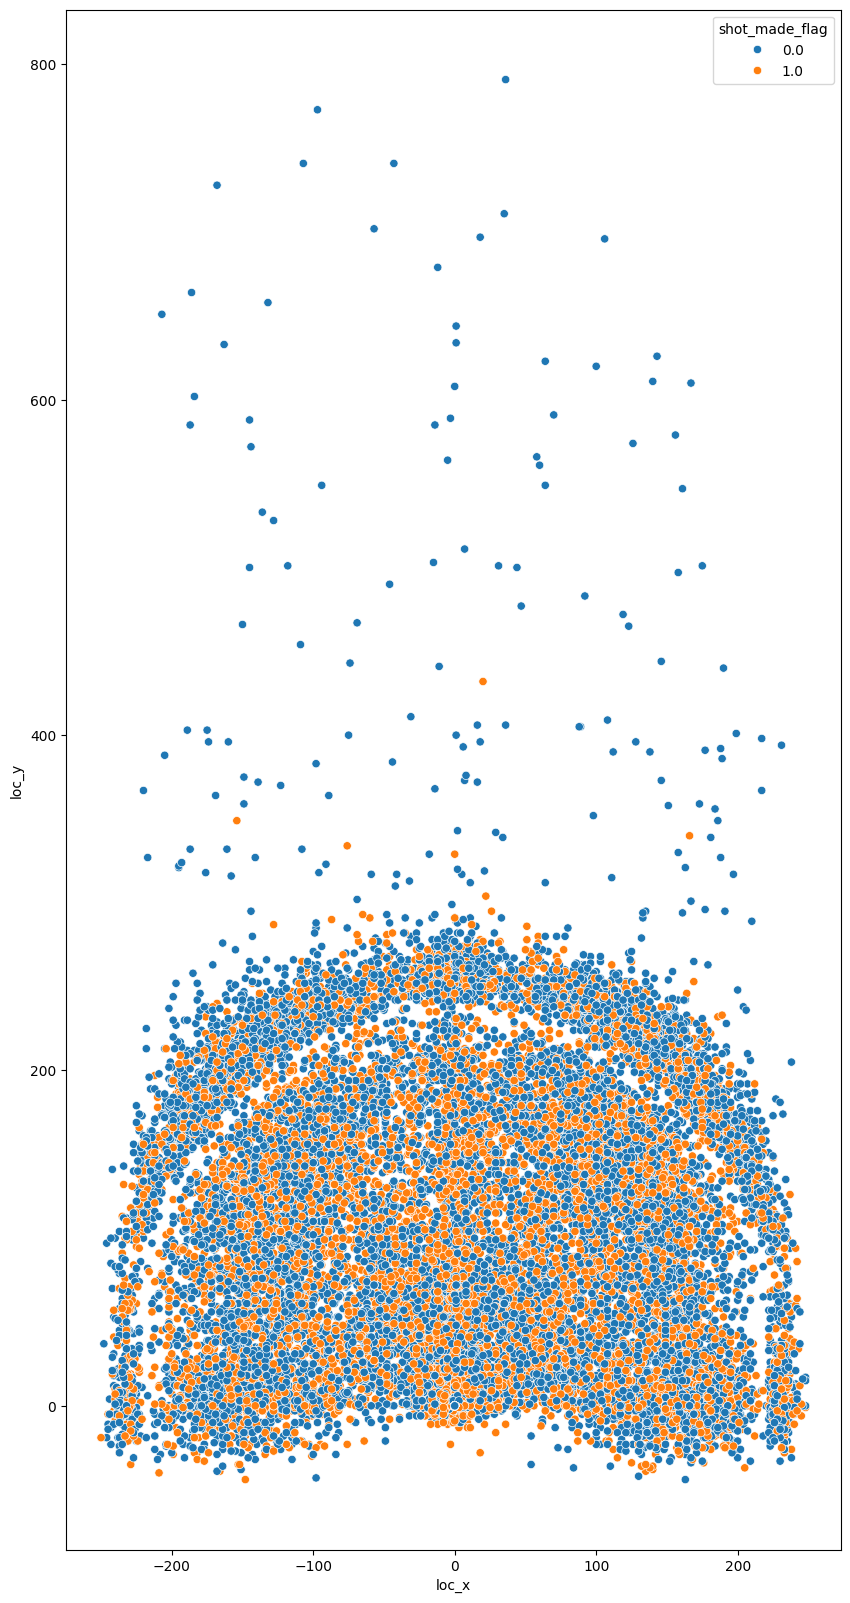

In [37]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='loc_x',y='loc_y',hue='shot_made_flag',data=data)
plt.show()

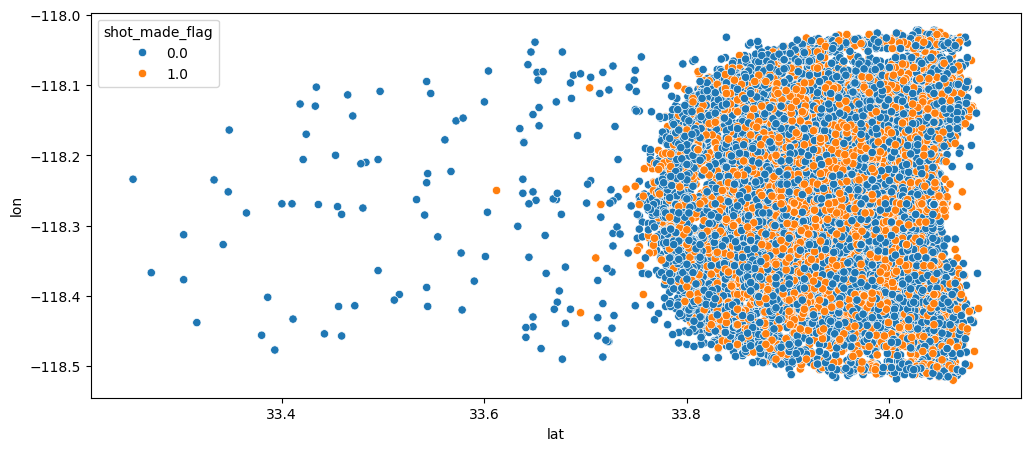

In [38]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lat',y='lon',hue='shot_made_flag',data=data)
plt.show()

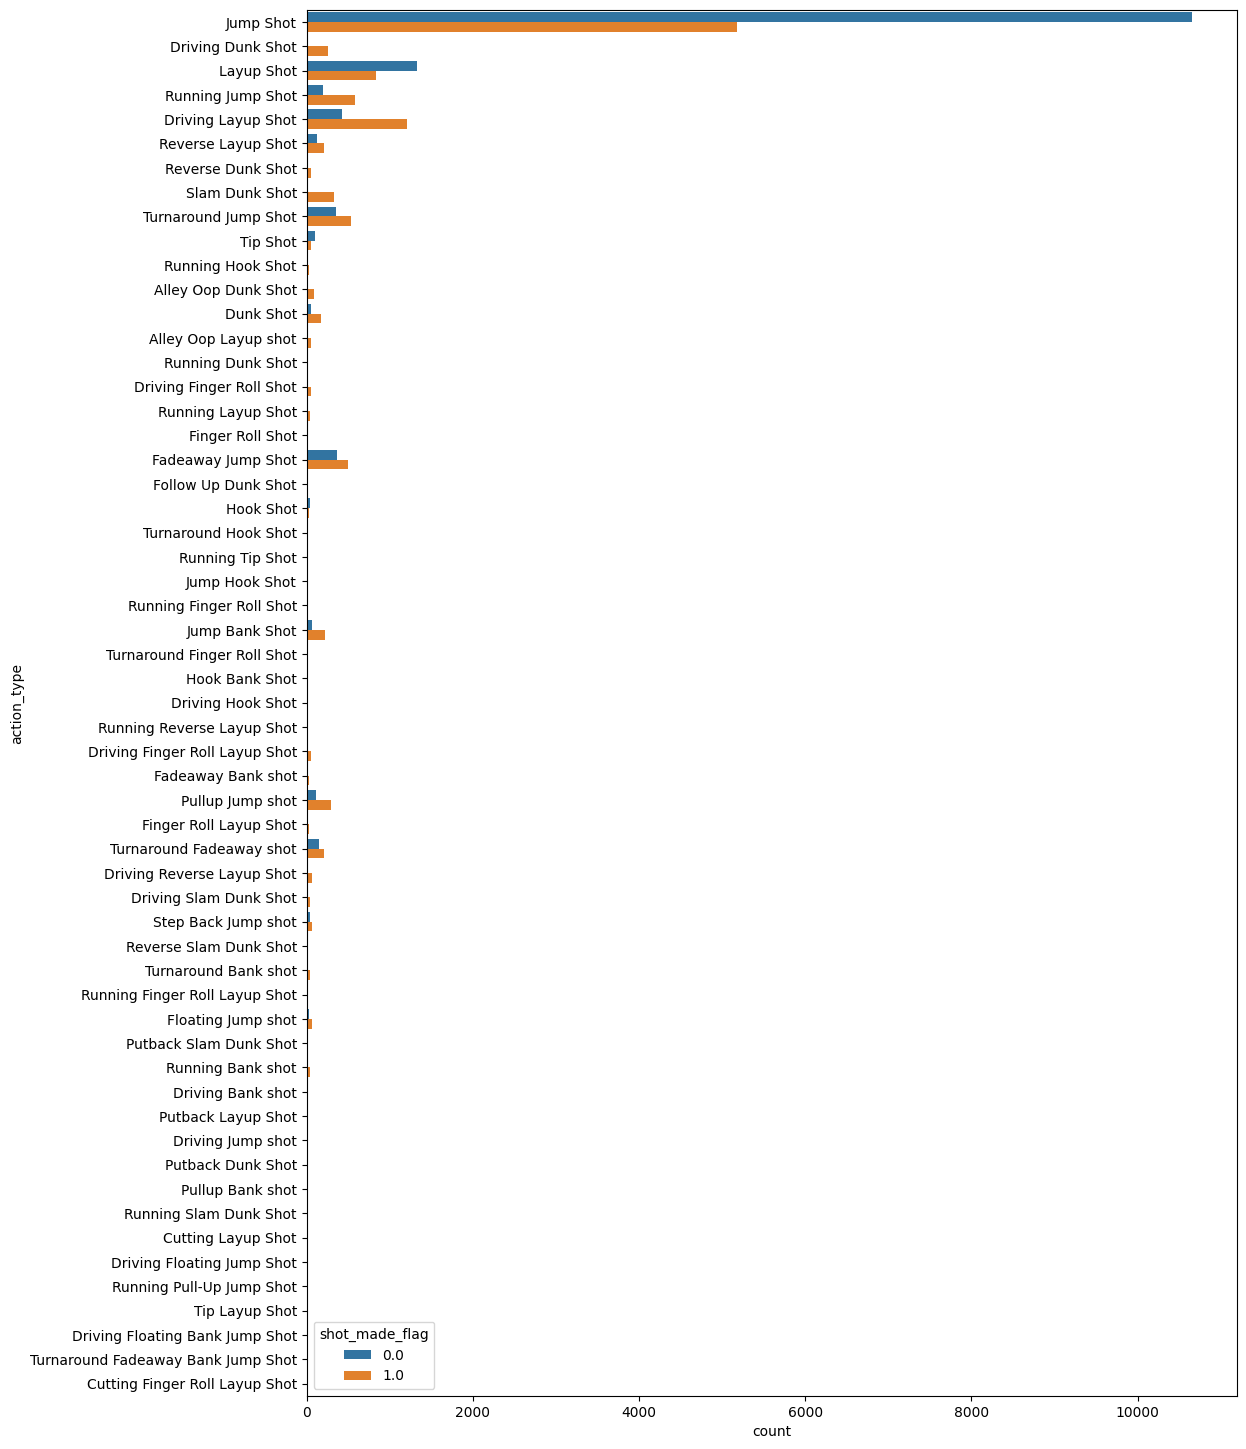

In [39]:
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)
plt.show()

The majority of shots are made by Jump Shot and the majority of baskets are made in Jump Shot(action_type).
The second highest baskets are made in Driving  Shot.
In Bank Shot and Dunk Shot very few attempts were made.


In [40]:
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

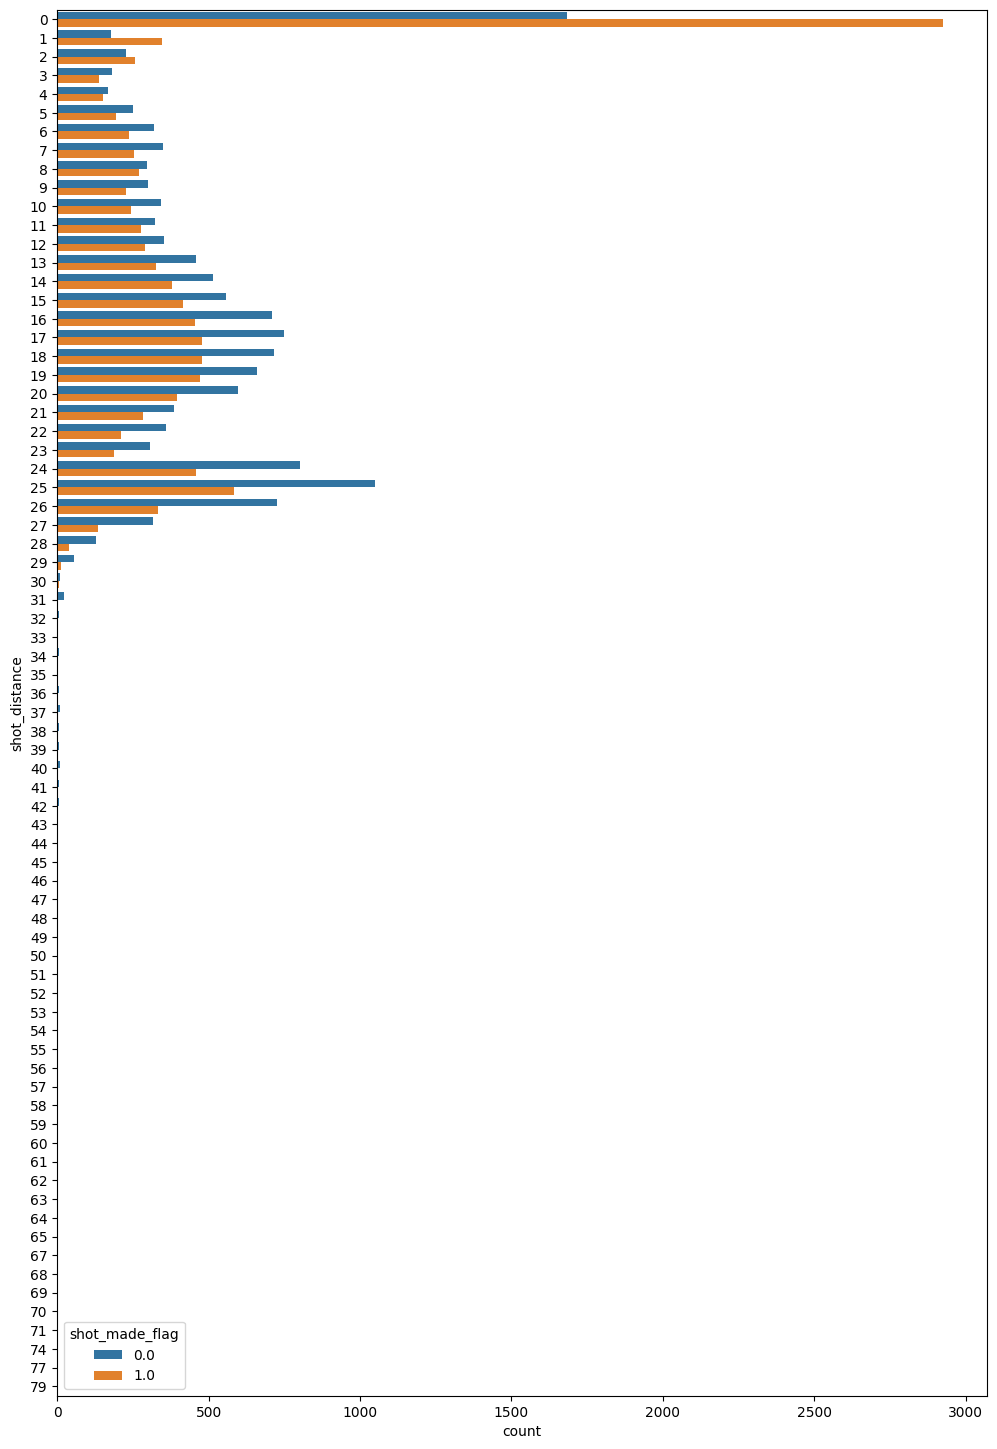

In [41]:
plt.figure(figsize=(12,18))
sns.countplot(y="shot_distance", hue="shot_made_flag", data=data)
plt.show()

If shot_distance is more than 30, then the player has made very less attempts. If shot_distance is less than 1, then maximum attempts were made. If shot_distance is 25,then second maximum attempts were made. Around 95% shots were made if shot_ditance is less than 30.

In [42]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

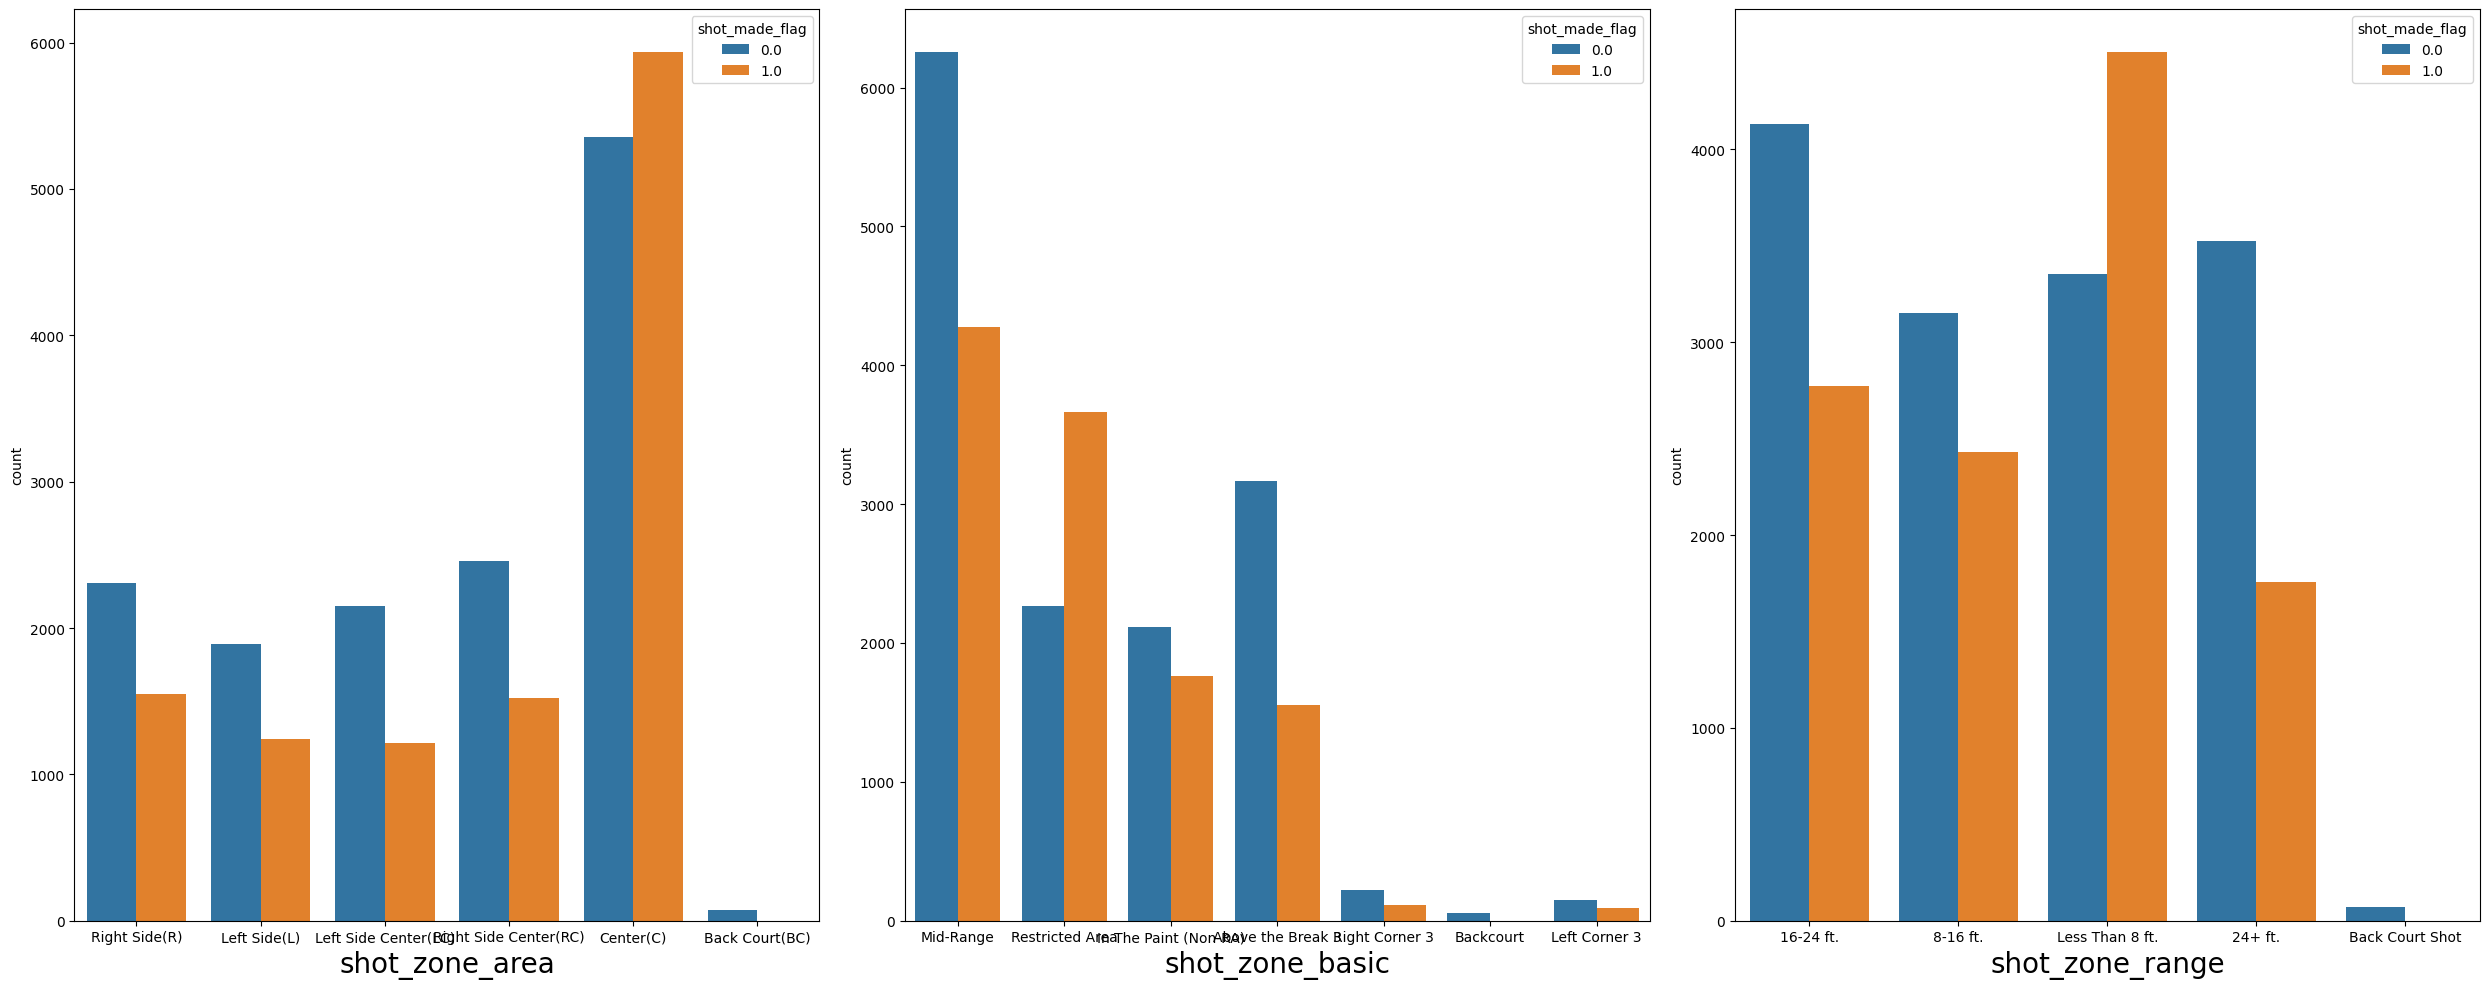

In [43]:
cat1_cols= data[['shot_zone_area', 'shot_zone_basic', 'shot_zone_range','shot_made_flag']]
plt.figure(figsize=(25, 10), facecolor='white')
plotnumber = 1

for columns in cat1_cols:
    if plotnumber<=3 :
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(x=columns,data=cat1_cols,hue='shot_made_flag')
        plt.xlabel(columns,fontsize=20)
        plotnumber+=1
plt.tight_layout()
plt.show()

# Data preprocessing

In [44]:
data.shot_made_flag.value_counts()

shot_made_flag
0.0    14232
1.0    11465
Name: count, dtype: int64

In [45]:
data.isnull().sum()

action_type              0
combined_shot_type       0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_name                0
matchup                  0
opponent                 0
dtype: int64

In [46]:
data.head(25)

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR
5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR
6,Layup Shot,Layup,34.0443,0,0,-118.2698,8,3,0,2000-01,52,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR
7,Jump Shot,Jump Shot,34.0163,1,28,-118.2688,8,3,0,2000-01,5,2,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR
8,Jump Shot,Jump Shot,33.9363,-65,108,-118.3348,6,3,0,2000-01,12,12,1.0,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,Los Angeles Lakers,LAL @ POR,POR
9,Running Jump Shot,Jump Shot,33.9193,-33,125,-118.3028,3,3,0,2000-01,36,12,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,Los Angeles Lakers,LAL @ POR,POR


In [47]:
data.shape

(30697, 20)

In [48]:
data = data.dropna()
data.dropna(inplace=True)
print(data)

              action_type combined_shot_type      lat  loc_x  loc_y       lon  \
1               Jump Shot          Jump Shot  34.0443   -157      0 -118.4268   
2               Jump Shot          Jump Shot  33.9093   -101    135 -118.3708   
3               Jump Shot          Jump Shot  33.8693    138    175 -118.1318   
4       Driving Dunk Shot               Dunk  34.0443      0      0 -118.2698   
5               Jump Shot          Jump Shot  34.0553   -145    -11 -118.4148   
...                   ...                ...      ...    ...    ...       ...   
30691  Driving Layup Shot              Layup  34.0443      0      0 -118.2698   
30692           Jump Shot          Jump Shot  33.9963      1     48 -118.2688   
30694   Running Jump Shot          Jump Shot  33.8783   -134    166 -118.4038   
30695           Jump Shot          Jump Shot  33.7773     31    267 -118.2388   
30696           Jump Shot          Jump Shot  33.9723      1     72 -118.2688   

       minutes_remaining  p

In [49]:
data.shape

(25697, 20)

In [50]:
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

In [51]:
data_box = data[['lat', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance', 
       ]]

In [52]:
data_box

,lat,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
1,34.0443,-157,0,10,1,0,22,15
2,33.9093,-101,135,7,1,0,45,16
3,33.8693,138,175,6,1,0,52,22
4,34.0443,0,0,6,2,0,19,0
5,34.0553,-145,-11,9,3,0,32,14
...,...,...,...,...,...,...,...,...
30691,34.0443,0,0,7,4,1,4,0
30692,33.9963,1,48,6,4,1,5,4
30694,33.8783,-134,166,3,4,1,28,21
30695,33.7773,31,267,2,4,1,10,26


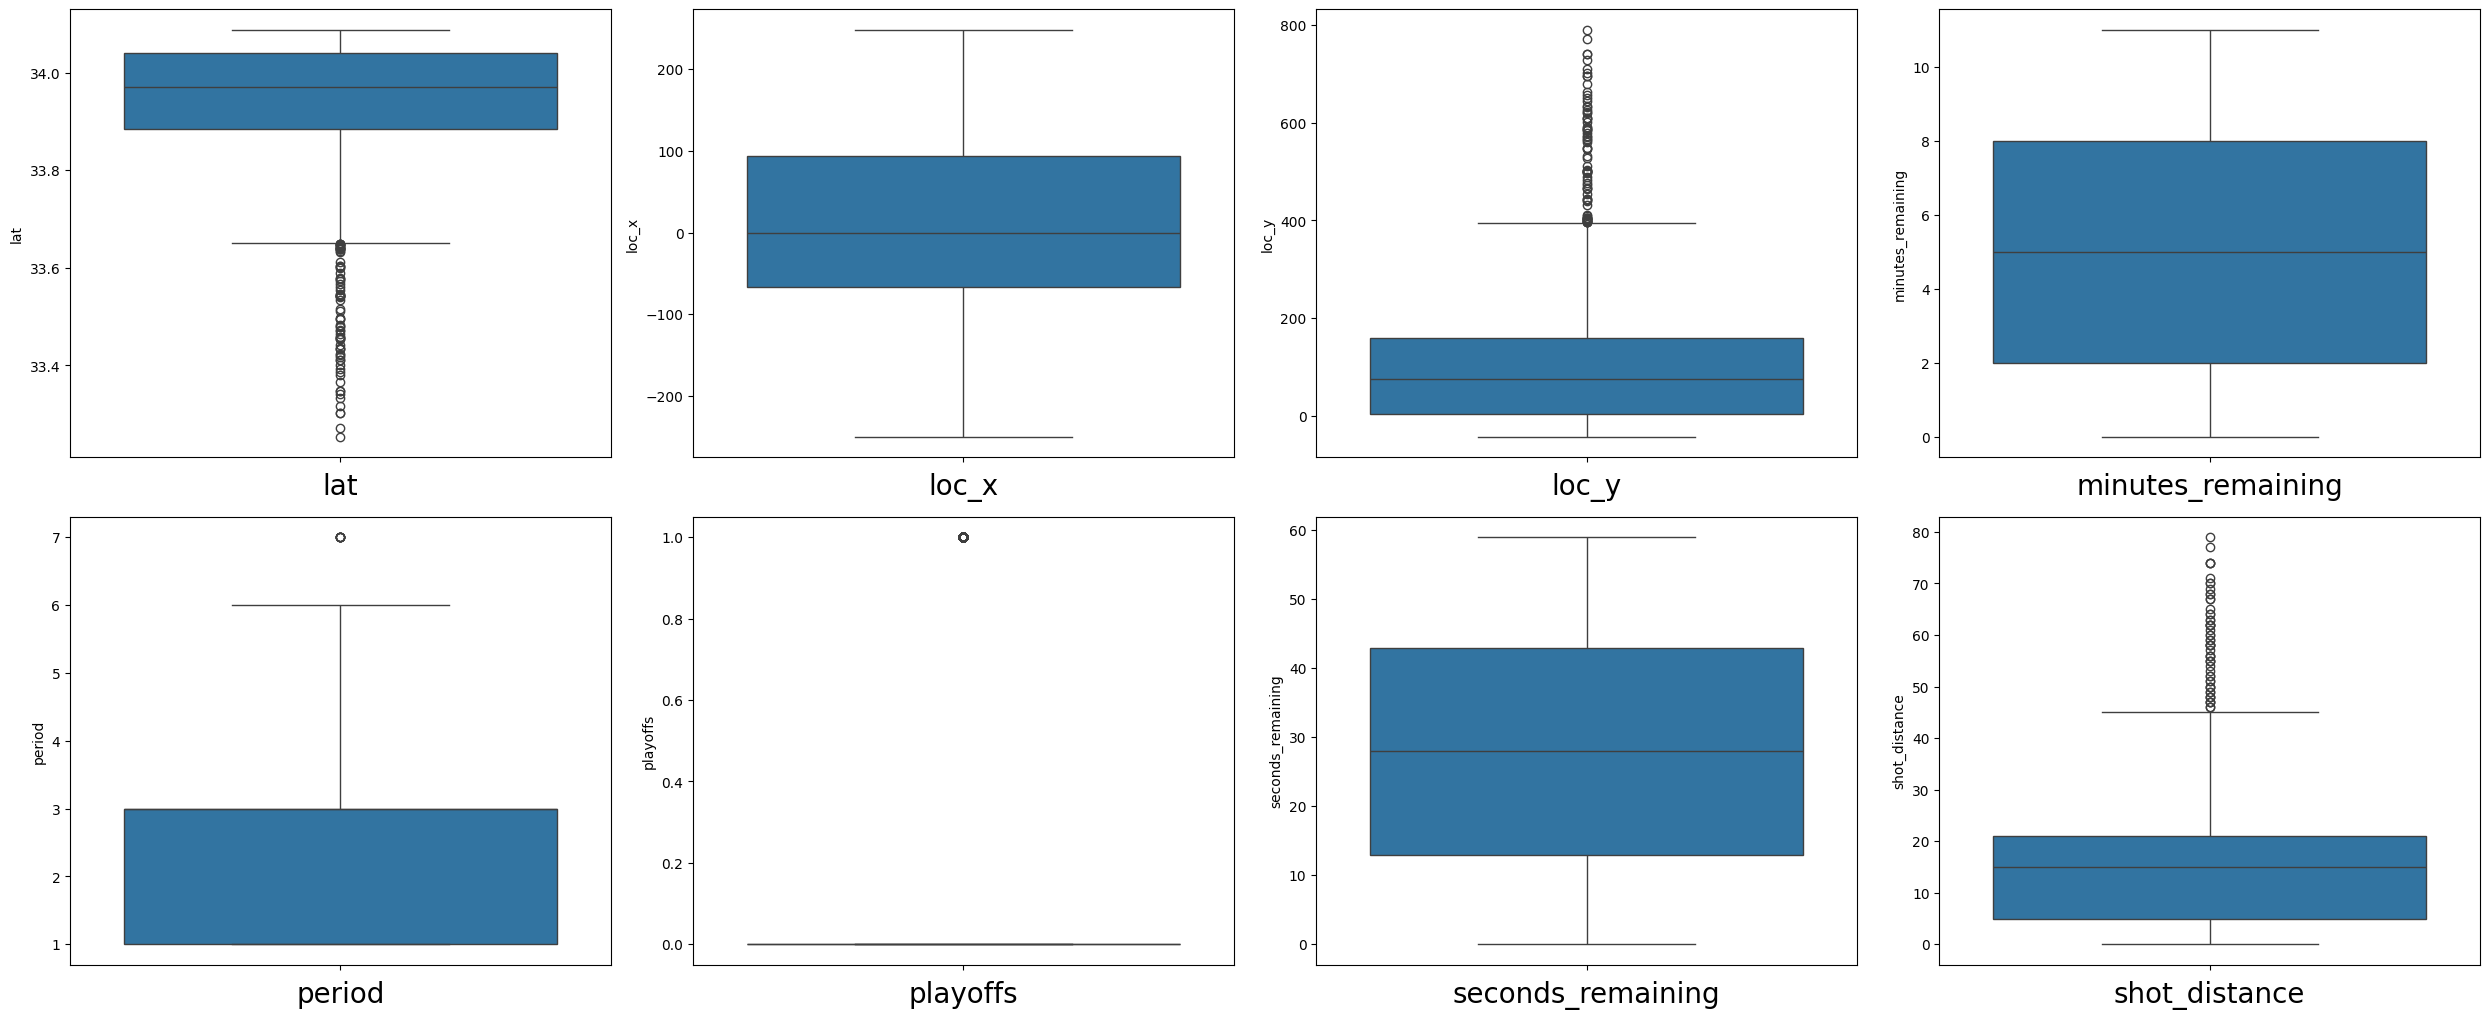

In [53]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data_box:
    if plotnumber<=16 :
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
       
    plotnumber+=1
plt.tight_layout()
plt.show()

In [54]:
data2 = data[['lat', 'loc_y', 'period', 'playoffs', 'shot_distance']]

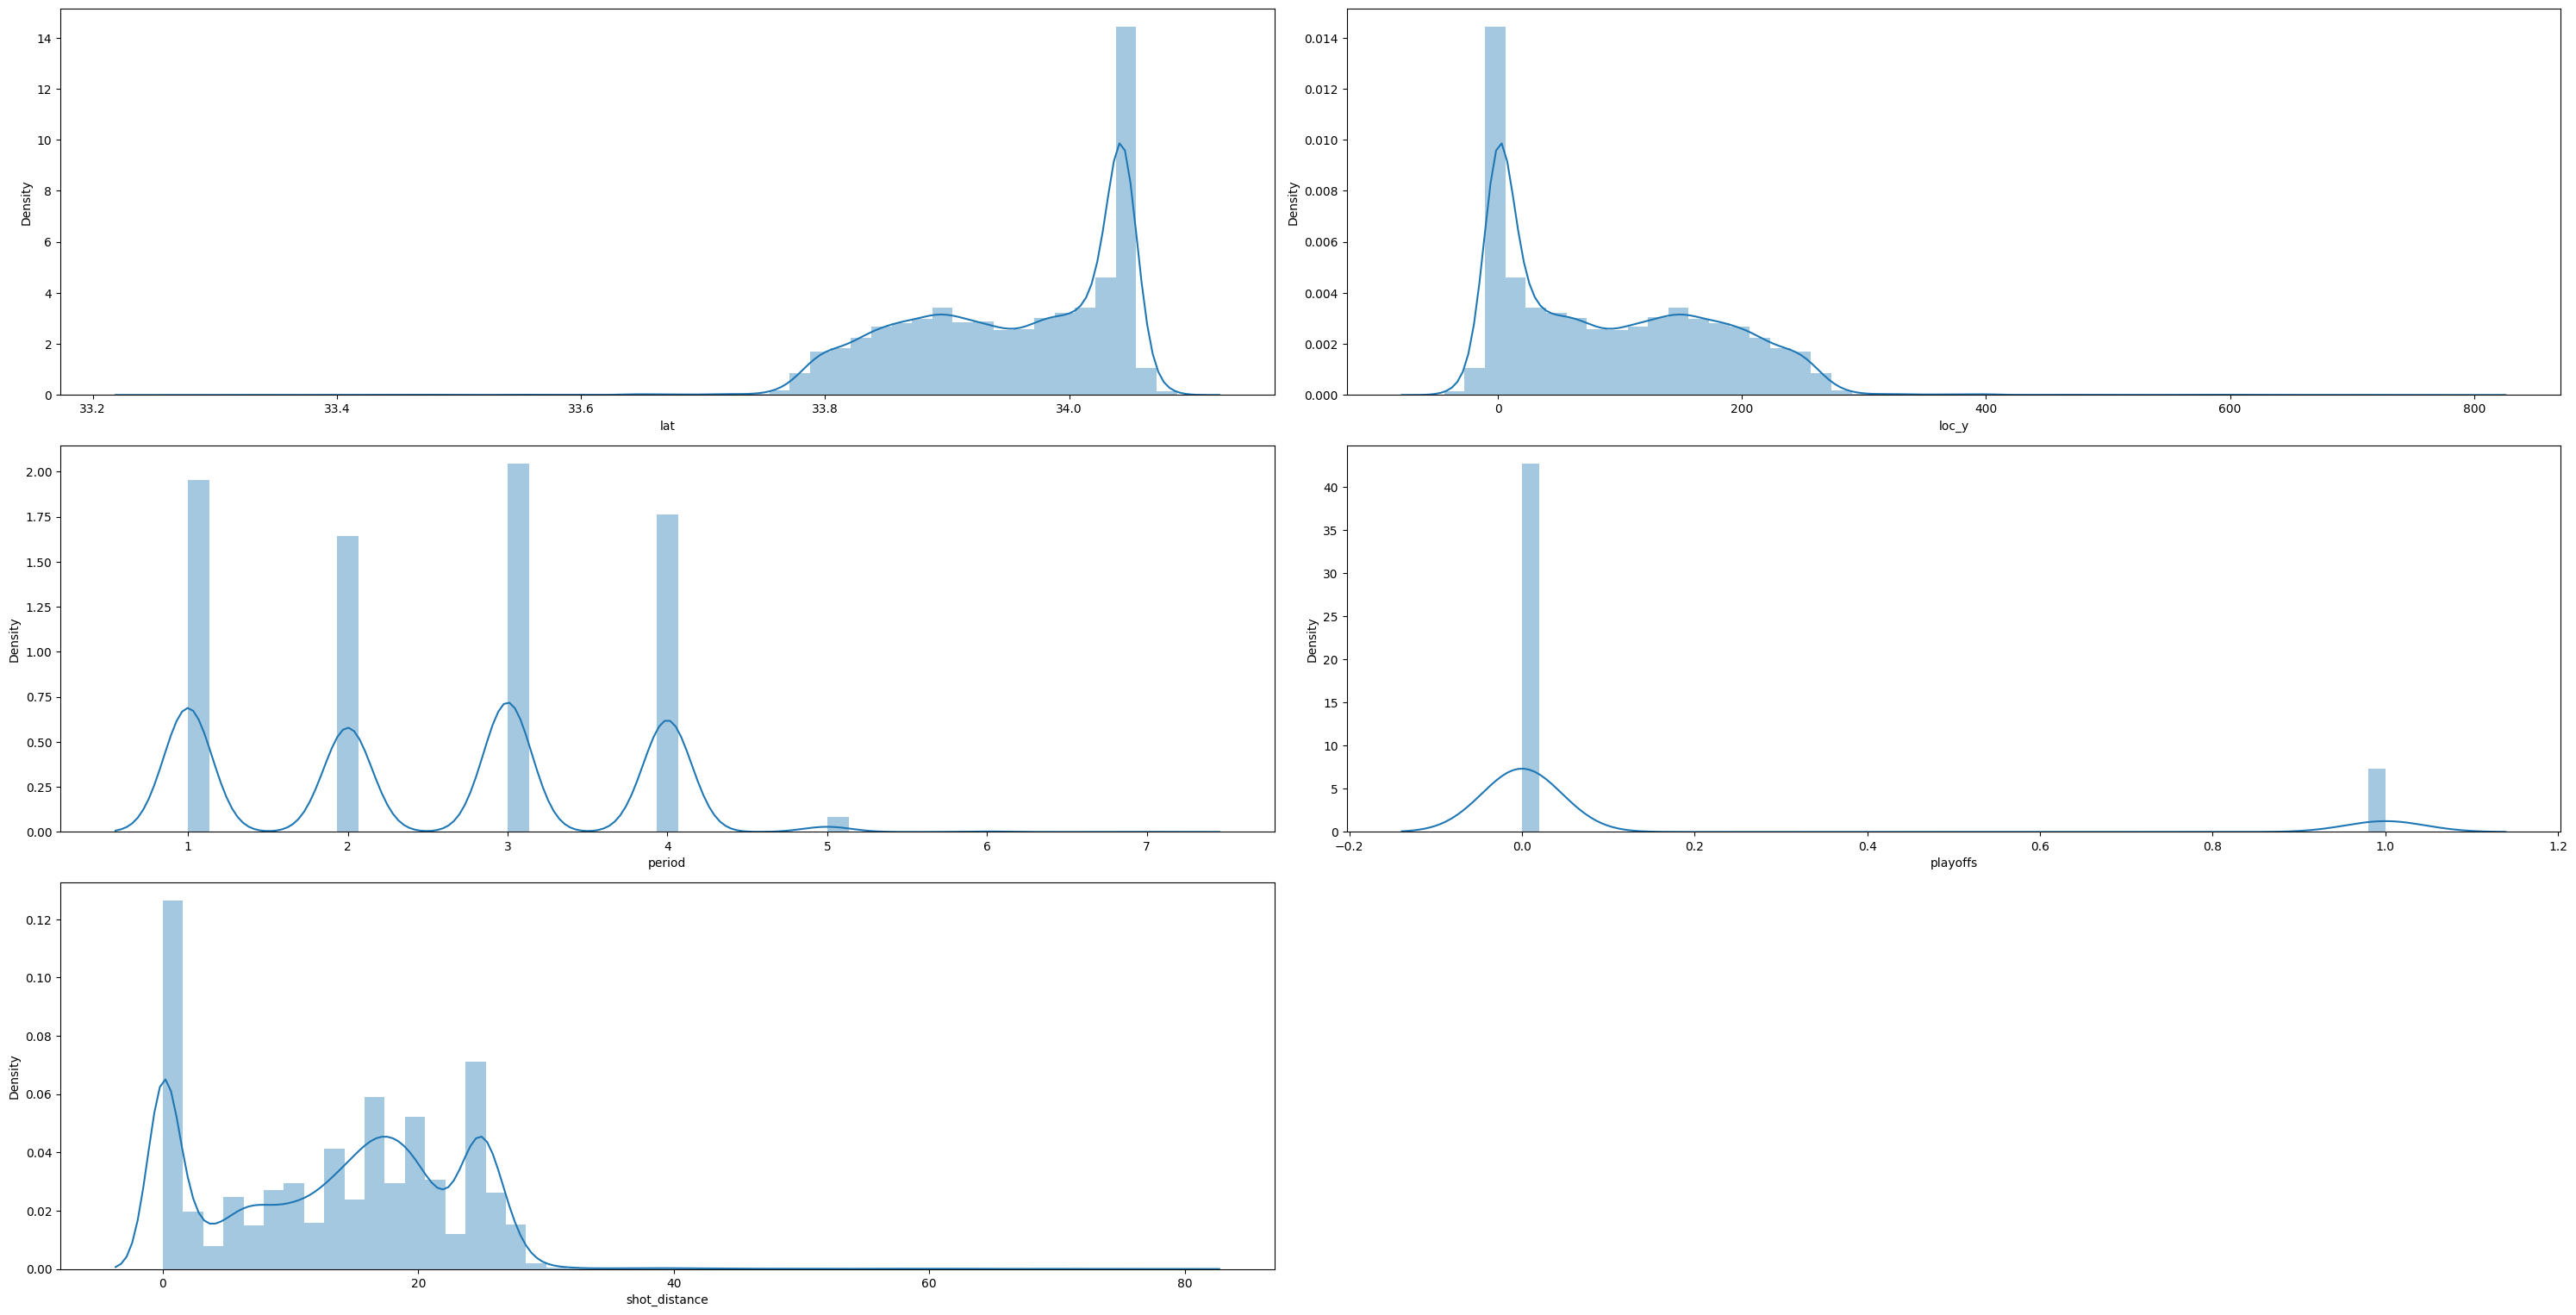

In [55]:
plt.figure(figsize=(30,20),facecolor='white')

plotnumber=1

for column in data2:
    if plotnumber<=8 :
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
       
    plotnumber+=1
plt.tight_layout() 
plt.show()

## Outliers Handling

### Lat

In [56]:
## using IQR to remove the outliers
IQR = stats.iqr(data.lat, interpolation = 'midpoint') 

IQR

0.1559999999999988

In [57]:
Q1= data.lat.quantile(0.25)

Q3= data.lat.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [58]:
max_limit

34.2743

In [59]:
min_limit

33.6503

In [60]:
data.loc[data['lat'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


In [61]:
data.loc[data['lat'] < min_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
177,Jump Shot,Jump Shot,33.5673,47,477,-118.2228,0,2,0,2000-01,0,47,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SAC,SAC
313,Jump Shot,Jump Shot,33.6353,108,409,-118.1618,0,3,0,2000-01,0,42,0.0,3PT Field Goal,Back Court(BC),Above the Break 3,Back Court Shot,Los Angeles Lakers,LAL vs. IND,IND
322,Jump Shot,Jump Shot,33.5783,-150,466,-118.4198,0,1,0,2000-01,0,48,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SEA,SEA
585,Jump Shot,Jump Shot,33.4243,100,620,-118.1698,0,1,0,2000-01,0,62,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ TOR,TOR
1073,Jump Shot,Jump Shot,33.3483,106,696,-118.1638,0,2,0,2000-01,0,70,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. PHX,PHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,Jump Shot,Jump Shot,33.4213,64,623,-118.2058,0,1,1,1996-97,0,62,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ UTA,UTA
30149,Jump Shot,Jump Shot,33.5903,-109,454,-118.3788,0,1,1,1997-98,0,46,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ UTA,UTA
30574,Jump Shot,Jump Shot,33.4553,-3,589,-118.2728,0,2,1,1999-00,0,58,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ POR,POR
30612,Jump Shot,Jump Shot,33.5473,158,497,-118.1118,0,1,1,1999-00,0,52,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. IND,IND


In [62]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['lat']<min_limit]) / len(data) *100
# 2 /200 * 100

0.29575436821418843

In [63]:
data.loc[data['lat'] < min_limit,'lat']=np.median(data.lat)

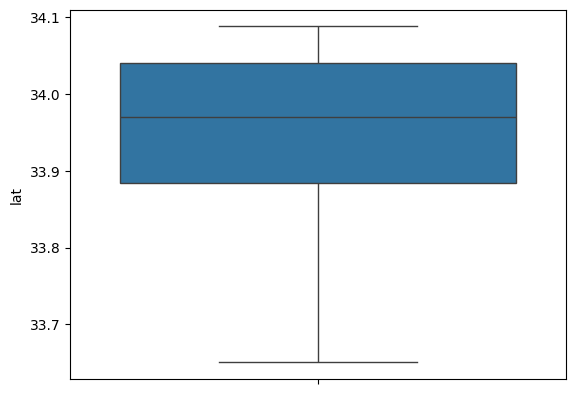

In [64]:
sns.boxplot(data.lat)
plt.show()

### Loc_y


In [65]:
## using IQR to remove the outliers
IQR = stats.iqr(data.loc_y, interpolation = 'midpoint') 

IQR

156.0

In [66]:
Q1= data.loc_y.quantile(0.25)

Q3= data.loc_y.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [67]:
max_limit

394.0

In [68]:
min_limit

-230.0

In [69]:
data.loc[data['loc_y'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
177,Jump Shot,Jump Shot,33.9703,47,477,-118.2228,0,2,0,2000-01,0,47,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SAC,SAC
313,Jump Shot,Jump Shot,33.9703,108,409,-118.1618,0,3,0,2000-01,0,42,0.0,3PT Field Goal,Back Court(BC),Above the Break 3,Back Court Shot,Los Angeles Lakers,LAL vs. IND,IND
322,Jump Shot,Jump Shot,33.9703,-150,466,-118.4198,0,1,0,2000-01,0,48,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SEA,SEA
585,Jump Shot,Jump Shot,33.9703,100,620,-118.1698,0,1,0,2000-01,0,62,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ TOR,TOR
1073,Jump Shot,Jump Shot,33.9703,106,696,-118.1638,0,2,0,2000-01,0,70,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. PHX,PHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,Jump Shot,Jump Shot,33.9703,64,623,-118.2058,0,1,1,1996-97,0,62,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ UTA,UTA
30149,Jump Shot,Jump Shot,33.9703,-109,454,-118.3788,0,1,1,1997-98,0,46,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ UTA,UTA
30574,Jump Shot,Jump Shot,33.9703,-3,589,-118.2728,0,2,1,1999-00,0,58,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ POR,POR
30612,Jump Shot,Jump Shot,33.9703,158,497,-118.1118,0,1,1,1999-00,0,52,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. IND,IND


In [70]:
data.loc[data['loc_y'] < min_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


In [71]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['loc_y']>max_limit]) / len(data) *100
# 2 /200 * 100

0.29575436821418843

In [72]:
data.loc[data['loc_y'] > max_limit,'loc_y']=np.median(data.loc_y)

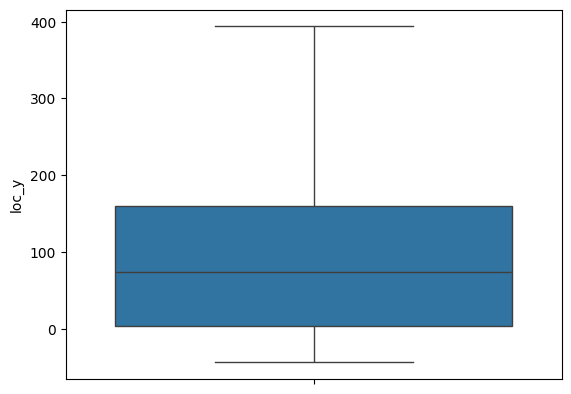

In [73]:
sns.boxplot(data.loc_y)
plt.show()

In [74]:
data.loc[data['loc_y'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


### Period

In [75]:
## using IQR to remove the outliers
IQR = stats.iqr(data.period, interpolation = 'midpoint') 

IQR

2.0

In [76]:

Q1= data.period.quantile(0.25)

Q3= data.period.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [77]:
min_limit

-2.0

In [78]:
max_limit

6.0

In [79]:
data.loc[data['period'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
10250,Running Layup Shot,Layup,34.0443,0,0,-118.2698,2,7,0,2006-07,7,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ CHA,CHA
10251,Jump Shot,Jump Shot,33.7943,-6,250,-118.2758,1,7,0,2006-07,2,25,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Los Angeles Lakers,LAL @ CHA,CHA
17833,Tip Shot,Tip Shot,34.0243,1,20,-118.2688,4,7,0,2010-11,4,2,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL vs. PHX,PHX
17834,Jump Shot,Jump Shot,33.8363,-71,208,-118.3408,3,7,0,2010-11,26,21,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. PHX,PHX
17835,Jump Shot,Jump Shot,33.8443,-161,200,-118.4308,2,7,0,2010-11,9,25,1.0,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Los Angeles Lakers,LAL vs. PHX,PHX
17836,Jump Shot,Jump Shot,33.8713,50,173,-118.2198,0,7,0,2010-11,44,18,0.0,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. PHX,PHX
17837,Floating Jump shot,Jump Shot,33.9723,-81,72,-118.3508,0,7,0,2010-11,14,10,1.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL vs. PHX,PHX


In [80]:
data.loc[data['period'] < min_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


In [81]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['period']>max_limit]) / len(data) *100
# 2 /200 * 100

0.027240533914464723

In [82]:
data.loc[data['period'] > max_limit,'period']=np.median(data.period)

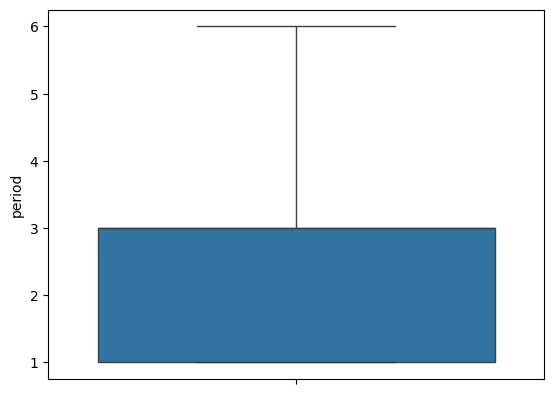

In [83]:
sns.boxplot(data.period)
plt.show()

In [84]:
data.loc[data['period'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


### Playoffs

In [85]:
IQR = stats.iqr(data.playoffs, interpolation = 'midpoint') 

IQR

0.0

In [86]:
Q1= data.playoffs.quantile(0.25)

Q3= data.playoffs.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [87]:
min_limit

0.0

In [88]:
max_limit

0.0

In [89]:
data.loc[data['playoffs'] > max_limit]


,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
26198,Jump Shot,Jump Shot,33.9593,-1,85,-118.2708,10,1,1,2000-01,24,8,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,Los Angeles Lakers,LAL vs. POR,POR
26199,Jump Shot,Jump Shot,33.8653,-109,179,-118.3788,7,1,1,2000-01,35,20,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. POR,POR
26200,Driving Layup Shot,Layup,34.0443,0,0,-118.2698,5,1,1,2000-01,36,0,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL vs. POR,POR
26201,Jump Shot,Jump Shot,33.9033,161,141,-118.1088,5,2,1,2000-01,41,21,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. POR,POR
26202,Jump Shot,Jump Shot,34.0273,-58,17,-118.3278,4,2,1,2000-01,31,6,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,Los Angeles Lakers,LAL vs. POR,POR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,34.0443,0,0,-118.2698,7,4,1,1999-00,4,0,0.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND
30692,Jump Shot,Jump Shot,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND
30694,Running Jump Shot,Jump Shot,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. IND,IND
30695,Jump Shot,Jump Shot,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Los Angeles Lakers,LAL vs. IND,IND


In [90]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['playoffs']>max_limit]) / len(data) *100
# 2 /200 * 100

14.624275207222635

### Shot Distance

In [91]:
IQR = stats.iqr(data.shot_distance, interpolation = 'midpoint') 

IQR

16.0

In [92]:
Q1= data.shot_distance.quantile(0.25)

Q3= data.shot_distance.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [93]:
min_limit

-19.0

In [94]:
max_limit

45.0

In [95]:
data.loc[data['shot_distance'] > max_limit]


,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent
177,Jump Shot,Jump Shot,33.9703,47,74,-118.2228,0,2,0,2000-01,0,47,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SAC,SAC
322,Jump Shot,Jump Shot,33.9703,-150,74,-118.4198,0,1,0,2000-01,0,48,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SEA,SEA
585,Jump Shot,Jump Shot,33.9703,100,74,-118.1698,0,1,0,2000-01,0,62,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ TOR,TOR
1073,Jump Shot,Jump Shot,33.9703,106,74,-118.1638,0,2,0,2000-01,0,70,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. PHX,PHX
1605,Jump Shot,Jump Shot,33.9703,-145,74,-118.4148,0,3,0,2001-02,0,60,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. MEM,MEM
2523,Jump Shot,Jump Shot,33.9703,60,74,-118.2098,0,3,0,2001-02,0,56,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ POR,POR
3211,Jump Shot,Jump Shot,33.9703,64,74,-118.2058,0,1,0,2002-03,0,55,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ BOS,BOS
3553,Jump Shot,Jump Shot,33.9703,-118,74,-118.3878,0,3,0,2002-03,0,51,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL vs. MEM,MEM
3715,Jump Shot,Jump Shot,33.9703,-207,74,-118.4768,0,3,0,2002-03,0,68,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ PHI,PHI
4077,Jump Shot,Jump Shot,33.9703,-69,74,-118.3388,0,1,0,2002-03,0,47,0.0,3PT Field Goal,Back Court(BC),Backcourt,Back Court Shot,Los Angeles Lakers,LAL @ SAC,SAC


In [96]:
data.loc[data['shot_distance'] < min_limit]


,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


In [97]:
# Checking the percentage of outlier in the dataset
len(data.loc[data['shot_distance']>max_limit]) / len(data) *100
# 2 /200 * 100

0.2218157761606413

In [98]:
data.loc[data['shot_distance'] > max_limit,'shot_distance']=np.median(data.shot_distance)

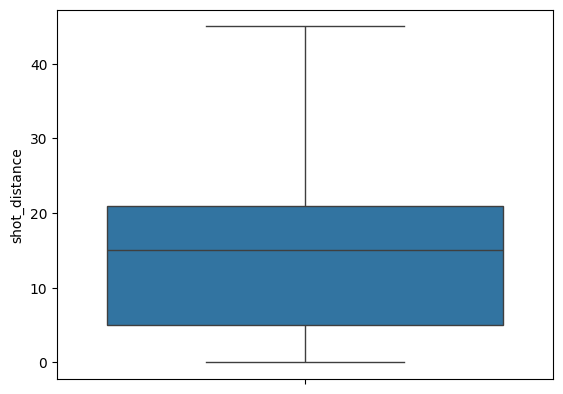

In [99]:
sns.boxplot(data.shot_distance)
plt.show()

In [100]:
data.loc[data['shot_distance'] > max_limit]

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent


In [101]:
data.shape


(25697, 20)

## Encoding Categorical Variables

In [102]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [103]:
df1 = data.select_dtypes(include=['object', 'category'])
df1.columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [104]:
data.action_type.value_counts()

action_type
Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Runn

In [105]:
data.combined_shot_type.value_counts()

combined_shot_type
Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: count, dtype: int64

In [106]:
data.shot_type.value_counts()

shot_type
2PT Field Goal    20285
3PT Field Goal     5412
Name: count, dtype: int64

In [107]:
data.shot_zone_area.value_counts()

shot_zone_area
Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: count, dtype: int64

In [108]:
data.shot_zone_basic.value_counts()

shot_zone_basic
Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: count, dtype: int64

In [109]:
data.shot_zone_range.value_counts()

shot_zone_range
Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: count, dtype: int64

In [110]:
data.matchup.value_counts()

matchup
LAL @ SAS      853
LAL vs. SAS    765
LAL @ PHX      751
LAL @ SAC      751
LAL vs. HOU    722
              ... 
LAL @ PHO       29
LAL vs. NOP     21
LAL vs. SAN     20
LAL @ UTH       15
LAL vs. BKN     13
Name: count, Length: 74, dtype: int64

In [111]:
data.opponent.value_counts()

opponent
SAS    1638
PHX    1535
HOU    1399
SAC    1397
DEN    1352
POR    1292
UTA    1238
MIN    1219
GSW    1143
LAC    1074
DAL    1033
MEM     871
BOS     783
SEA     694
IND     626
ORL     604
PHI     603
DET     587
NYK     566
OKC     561
TOR     556
MIA     517
CHI     516
CLE     514
MIL     507
WAS     501
CHA     500
NOH     475
ATL     438
NJN     422
NOP     287
VAN     204
BKN      45
Name: count, dtype: int64

In [112]:
data.season.value_counts()

season
2005-06    1924
2002-03    1852
2008-09    1851
2007-08    1819
2009-10    1772
2001-02    1708
2006-07    1579
2000-01    1575
2010-11    1521
2011-12    1416
2003-04    1371
2012-13    1328
1999-00    1312
2004-05    1127
2015-16     932
1997-98     810
1998-99     765
2014-15     593
1996-97     383
2013-14      59
Name: count, dtype: int64

In [113]:
df1.columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [114]:
# Columns to encode
categorical_col = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'matchup','team_name', 'opponent', 'season']

for col in categorical_col:
   df1[col + '_freq'] = df1[col].map(df1[col].value_counts())

print("\nFrequency Encoded DataFrame:\n", df1)


Frequency Encoded DataFrame:
               action_type combined_shot_type   season       shot_type  \
1               Jump Shot          Jump Shot  2000-01  2PT Field Goal   
2               Jump Shot          Jump Shot  2000-01  2PT Field Goal   
3               Jump Shot          Jump Shot  2000-01  2PT Field Goal   
4       Driving Dunk Shot               Dunk  2000-01  2PT Field Goal   
5               Jump Shot          Jump Shot  2000-01  2PT Field Goal   
...                   ...                ...      ...             ...   
30691  Driving Layup Shot              Layup  1999-00  2PT Field Goal   
30692           Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30694   Running Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30695           Jump Shot          Jump Shot  1999-00  3PT Field Goal   
30696           Jump Shot          Jump Shot  1999-00  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
1               Left

In [115]:
df1

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent,action_type_freq,combined_shot_type_freq,shot_type_freq,shot_zone_area_freq,shot_zone_basic_freq,shot_zone_range_freq,matchup_freq,team_name_freq,opponent_freq,season_freq
1,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,15836,19710,20285,3132,10532,5580,676,25697,1292,1575
2,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,15836,19710,20285,3364,10532,6907,676,25697,1292,1575
3,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,15836,19710,20285,3981,10532,6907,676,25697,1292,1575
4,Driving Dunk Shot,Dunk,2000-01,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR,257,1056,20285,11289,5932,7857,676,25697,1292,1575
5,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,15836,19710,20285,3132,10532,5580,676,25697,1292,1575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,Driving Layup Shot,Layup,1999-00,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND,1628,4532,20285,11289,5932,7857,348,25697,626,1312
30692,Jump Shot,Jump Shot,1999-00,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,Los Angeles Lakers,LAL vs. IND,IND,15836,19710,20285,11289,3880,7857,348,25697,626,1312
30694,Running Jump Shot,Jump Shot,1999-00,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL vs. IND,IND,779,19710,20285,3364,10532,6907,348,25697,626,1312
30695,Jump Shot,Jump Shot,1999-00,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Los Angeles Lakers,LAL vs. IND,IND,15836,19710,5412,11289,4720,5281,348,25697,626,1312


In [116]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

# Feature Scaling

In [117]:
data.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent'],
      dtype='object')

In [118]:
df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

In [119]:
df1.columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'matchup', 'opponent', 'action_type_freq', 'combined_shot_type_freq',
       'shot_type_freq', 'shot_zone_area_freq', 'shot_zone_basic_freq',
       'shot_zone_range_freq', 'matchup_freq', 'team_name_freq',
       'opponent_freq', 'season_freq'],
      dtype='object')

In [120]:
df = data[['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs','shot_made_flag', 'seconds_remaining', 'shot_distance']]

In [121]:
df2 = df1[[ 'action_type_freq', 'combined_shot_type_freq',
       'shot_type_freq', 'shot_zone_area_freq', 'shot_zone_basic_freq',
       'shot_zone_range_freq', 'matchup_freq', 'team_name_freq',
       'opponent_freq', 'season_freq', ]]

In [122]:
data1 = pd.concat([df, df2], axis=1)


In [123]:
df.shape

(25697, 10)

In [124]:
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['lat'].fillna(0, inplace=True)


In [125]:
print("\nColumn Data Type:", data['lat'].dtype)


Column Data Type: float64


In [126]:
data1  

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,shot_made_flag,seconds_remaining,shot_distance,action_type_freq,combined_shot_type_freq,shot_type_freq,shot_zone_area_freq,shot_zone_basic_freq,shot_zone_range_freq,matchup_freq,team_name_freq,opponent_freq,season_freq
1,34.0443,-157,0,-118.4268,10,1,0,0.0,22,15,15836,19710,20285,3132,10532,5580,676,25697,1292,1575
2,33.9093,-101,135,-118.3708,7,1,0,1.0,45,16,15836,19710,20285,3364,10532,6907,676,25697,1292,1575
3,33.8693,138,175,-118.1318,6,1,0,0.0,52,22,15836,19710,20285,3981,10532,6907,676,25697,1292,1575
4,34.0443,0,0,-118.2698,6,2,0,1.0,19,0,257,1056,20285,11289,5932,7857,676,25697,1292,1575
5,34.0553,-145,-11,-118.4148,9,3,0,0.0,32,14,15836,19710,20285,3132,10532,5580,676,25697,1292,1575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,34.0443,0,0,-118.2698,7,4,1,0.0,4,0,1628,4532,20285,11289,5932,7857,348,25697,626,1312
30692,33.9963,1,48,-118.2688,6,4,1,0.0,5,4,15836,19710,20285,11289,3880,7857,348,25697,626,1312
30694,33.8783,-134,166,-118.4038,3,4,1,1.0,28,21,779,19710,20285,3364,10532,6907,348,25697,626,1312
30695,33.7773,31,267,-118.2388,2,4,1,0.0,10,26,15836,19710,5412,11289,4720,5281,348,25697,626,1312


In [127]:
# scaling the variable between 0 to 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1)

In [128]:
scaled_data

array([[0.89954338, 0.18674699, 0.10045662, ..., 0.        , 0.78279975,
        0.81286863],
       [0.5913242 , 0.29919679, 0.4086758 , ..., 0.        , 0.78279975,
        0.81286863],
       [0.5       , 0.77911647, 0.5       , ..., 0.        , 0.78279975,
        0.81286863],
       ...,
       [0.52054795, 0.23293173, 0.47945205, ..., 0.        , 0.36472065,
        0.67184987],
       [0.28995434, 0.56425703, 0.71004566, ..., 0.        , 0.36472065,
        0.67184987],
       [0.73515982, 0.50401606, 0.26484018, ..., 0.        , 0.36472065,
        0.67184987]])

In [129]:
scaled_data = pd.DataFrame(scaled_data, columns=data1.columns)

In [130]:
scaled_data

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,shot_made_flag,seconds_remaining,shot_distance,action_type_freq,combined_shot_type_freq,shot_type_freq,shot_zone_area_freq,shot_zone_basic_freq,shot_zone_range_freq,matchup_freq,team_name_freq,opponent_freq,season_freq
0,0.899543,0.186747,0.100457,0.186747,0.909091,0.0,0.0,0.0,0.372881,0.333333,1.000000,1.000000,1.0,0.272800,1.000000,0.707514,0.789286,0.0,0.782800,0.812869
1,0.591324,0.299197,0.408676,0.299197,0.636364,0.0,0.0,1.0,0.762712,0.355556,1.000000,1.000000,1.0,0.293483,1.000000,0.877970,0.789286,0.0,0.782800,0.812869
2,0.500000,0.779116,0.500000,0.779116,0.545455,0.0,0.0,0.0,0.881356,0.488889,1.000000,1.000000,1.0,0.348489,1.000000,0.877970,0.789286,0.0,0.782800,0.812869
3,0.899543,0.502008,0.100457,0.502008,0.545455,0.2,0.0,1.0,0.322034,0.000000,0.016167,0.047779,1.0,1.000000,0.560733,1.000000,0.789286,0.0,0.782800,0.812869
4,0.924658,0.210843,0.075342,0.210843,0.818182,0.4,0.0,0.0,0.542373,0.311111,1.000000,1.000000,1.0,0.272800,1.000000,0.707514,0.789286,0.0,0.782800,0.812869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25692,0.899543,0.502008,0.100457,0.502008,0.636364,0.6,1.0,0.0,0.067797,0.000000,0.102747,0.225217,1.0,1.000000,0.560733,1.000000,0.398810,0.0,0.364721,0.671850
25693,0.789954,0.504016,0.210046,0.504016,0.545455,0.6,1.0,0.0,0.084746,0.088889,1.000000,1.000000,1.0,1.000000,0.364782,1.000000,0.398810,0.0,0.364721,0.671850
25694,0.520548,0.232932,0.479452,0.232932,0.272727,0.6,1.0,1.0,0.474576,0.466667,0.049132,1.000000,1.0,0.293483,1.000000,0.877970,0.398810,0.0,0.364721,0.671850
25695,0.289954,0.564257,0.710046,0.564257,0.181818,0.6,1.0,0.0,0.169492,0.577778,1.000000,1.000000,0.0,1.000000,0.444996,0.669107,0.398810,0.0,0.364721,0.671850


# Feature Selection

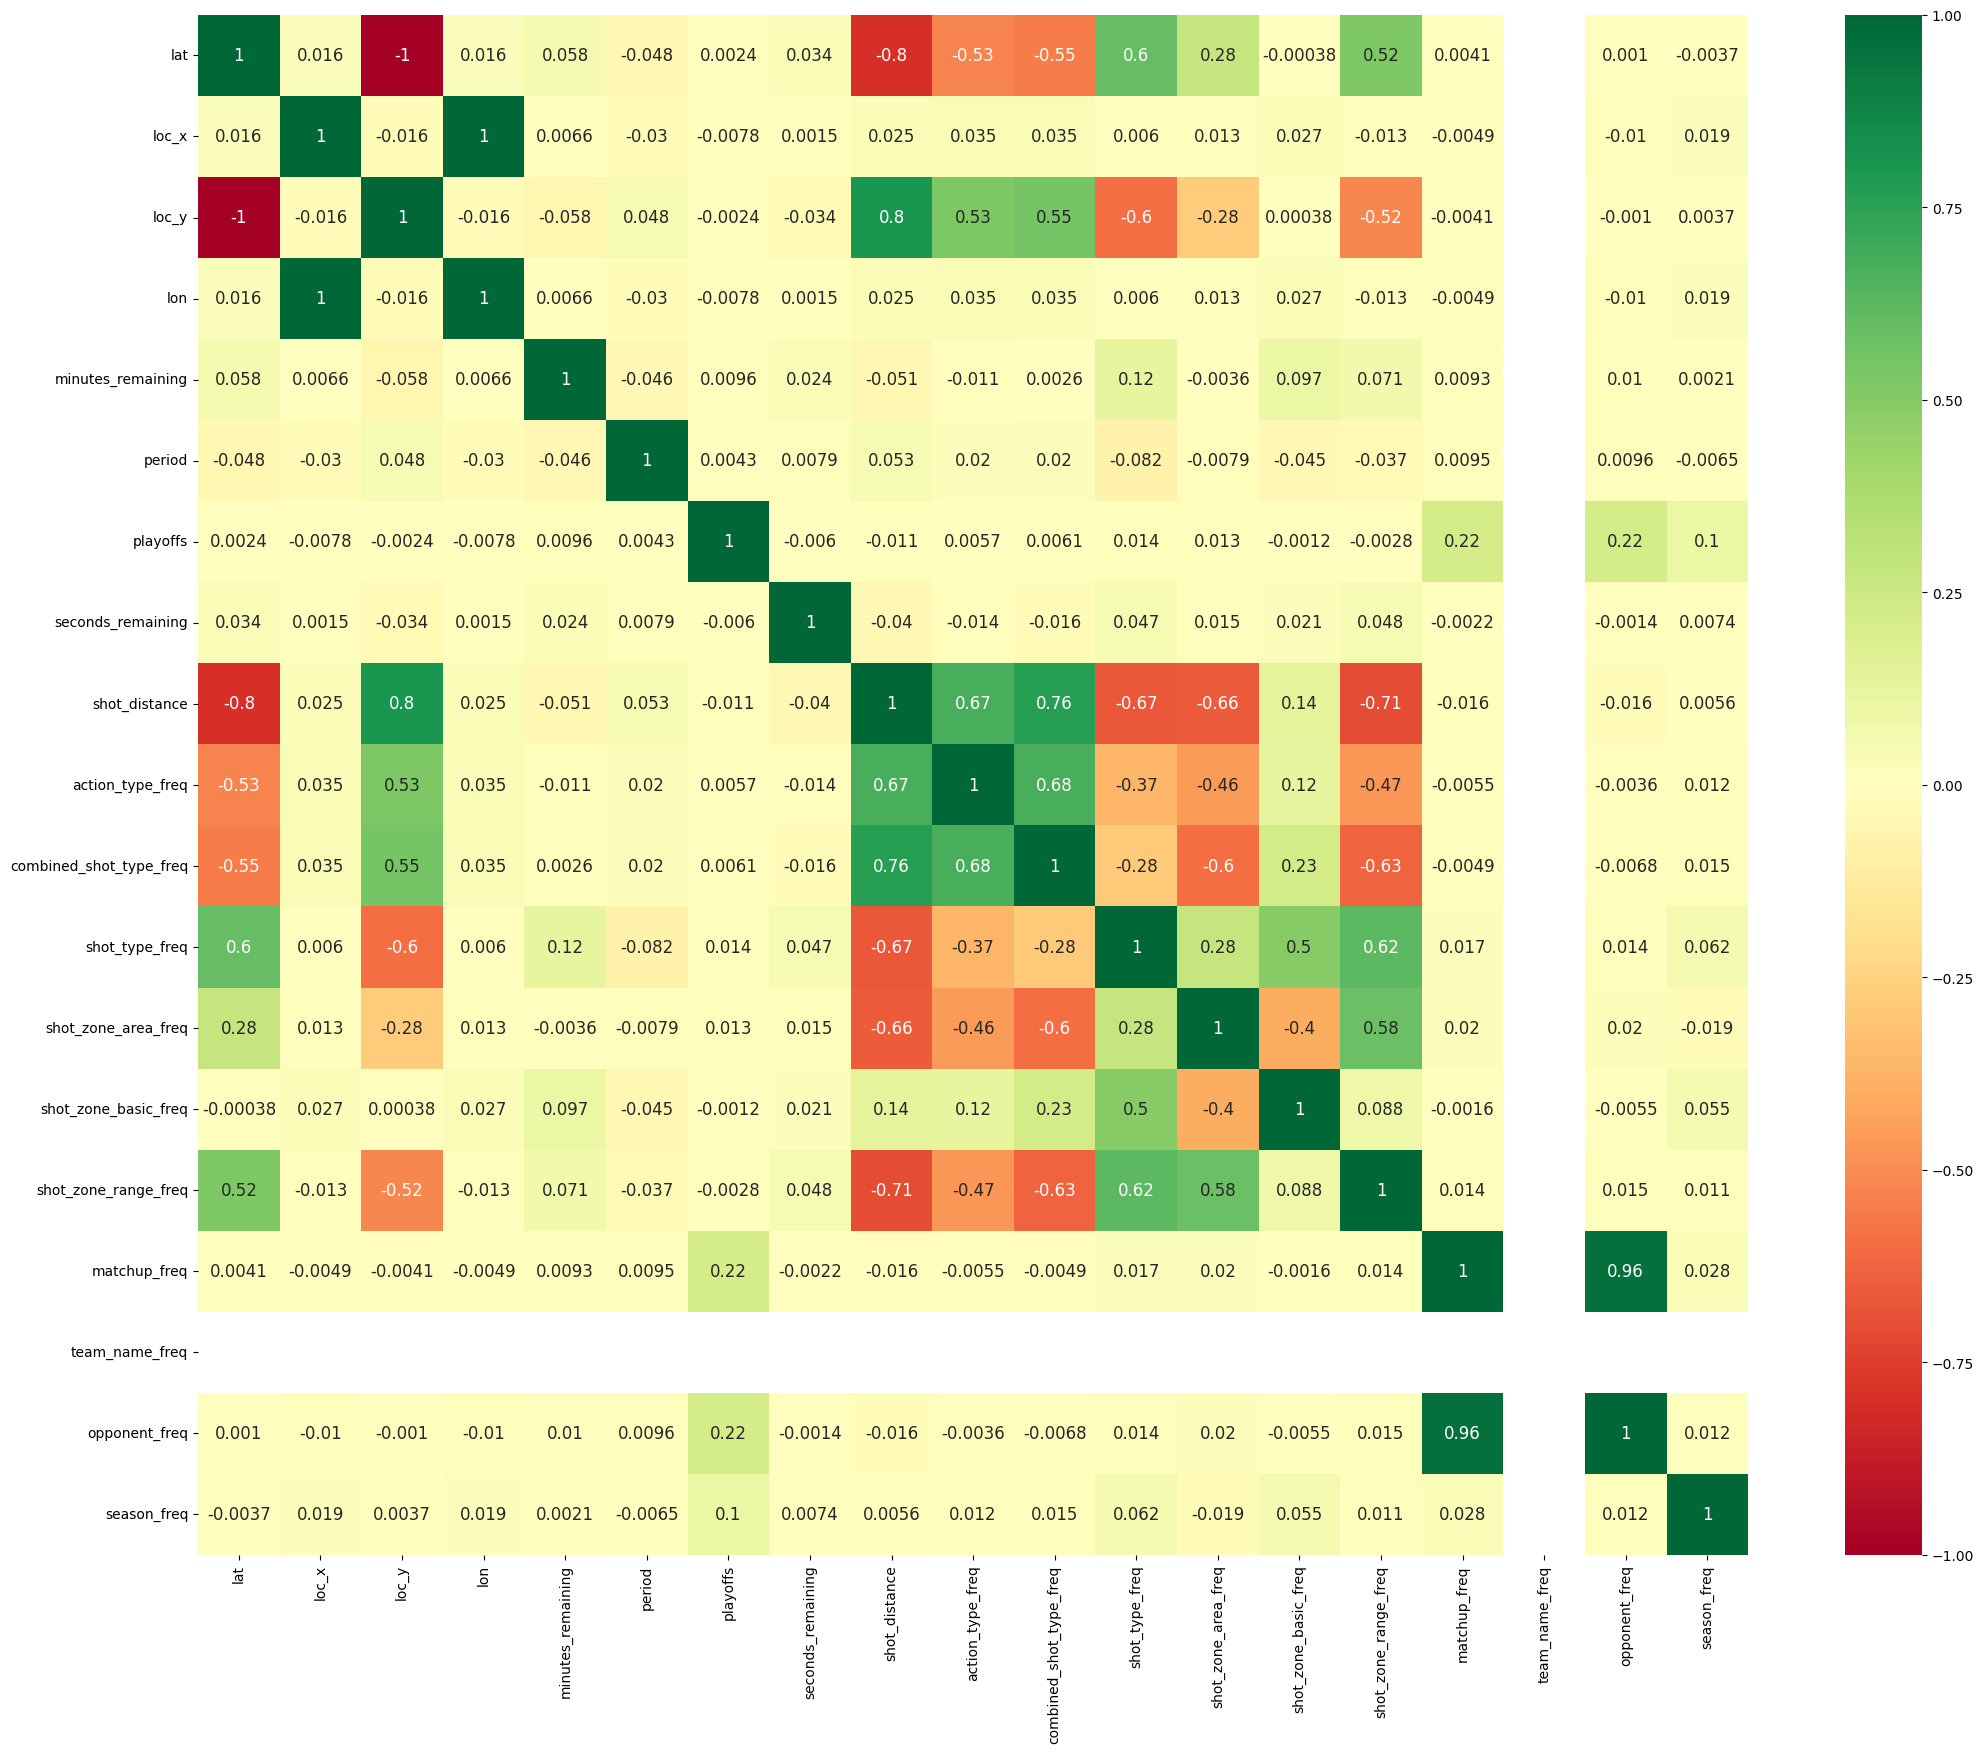

In [131]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.drop('shot_made_flag',axis=1).corr(),annot=True,cmap="RdYlGn", annot_kws={"size":12})
plt.show()

In [132]:
data1.drop(columns=['lon'], inplace=True)

# Model Creation

In [133]:
data1.columns

Index(['lat', 'loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs',
       'shot_made_flag', 'seconds_remaining', 'shot_distance',
       'action_type_freq', 'combined_shot_type_freq', 'shot_type_freq',
       'shot_zone_area_freq', 'shot_zone_basic_freq', 'shot_zone_range_freq',
       'matchup_freq', 'team_name_freq', 'opponent_freq', 'season_freq'],
      dtype='object')

In [134]:
## Creating independent and dependent variable
X=data1.iloc[:, [i for i in range(17) if i != 5]]
Y=data1.shot_made_flag

In [135]:
X

,lat,loc_x,loc_y,minutes_remaining,period,shot_made_flag,seconds_remaining,shot_distance,action_type_freq,combined_shot_type_freq,shot_type_freq,shot_zone_area_freq,shot_zone_basic_freq,shot_zone_range_freq,matchup_freq,team_name_freq
1,34.0443,-157,0,10,1,0.0,22,15,15836,19710,20285,3132,10532,5580,676,25697
2,33.9093,-101,135,7,1,1.0,45,16,15836,19710,20285,3364,10532,6907,676,25697
3,33.8693,138,175,6,1,0.0,52,22,15836,19710,20285,3981,10532,6907,676,25697
4,34.0443,0,0,6,2,1.0,19,0,257,1056,20285,11289,5932,7857,676,25697
5,34.0553,-145,-11,9,3,0.0,32,14,15836,19710,20285,3132,10532,5580,676,25697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,34.0443,0,0,7,4,0.0,4,0,1628,4532,20285,11289,5932,7857,348,25697
30692,33.9963,1,48,6,4,0.0,5,4,15836,19710,20285,11289,3880,7857,348,25697
30694,33.8783,-134,166,3,4,1.0,28,21,779,19710,20285,3364,10532,6907,348,25697
30695,33.7773,31,267,2,4,0.0,10,26,15836,19710,5412,11289,4720,5281,348,25697


In [136]:
Y

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
        ... 
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 25697, dtype: float64

In [137]:

## Creating testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [138]:
data.shot_made_flag.value_counts()

shot_made_flag
0.0    14232
1.0    11465
Name: count, dtype: int64

## Balancing the data

In [139]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("Actual values",Counter(Y))
X_sm,Y_sm=sm.fit_resample(X,Y)
print("Values after SMOTE",Counter(Y_sm))

Actual values Counter({0.0: 14232, 1.0: 11465})
Values after SMOTE Counter({0.0: 14232, 1.0: 14232})


In [140]:
X_train.shape

(20557, 16)

In [141]:
Y_train.shape

(20557,)

# Prediction from Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [143]:
Y_pred=model.predict(X_test)

In [144]:
Y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [146]:
pd.crosstab(Y_test,Y_pred)

col_0,0.0,1.0
shot_made_flag,,
0.0,2166,721
1.0,1038,1215


In [147]:
cr=classification_report(Y_test,Y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71      2887
         1.0       0.63      0.54      0.58      2253

    accuracy                           0.66      5140
   macro avg       0.65      0.64      0.65      5140
weighted avg       0.65      0.66      0.65      5140



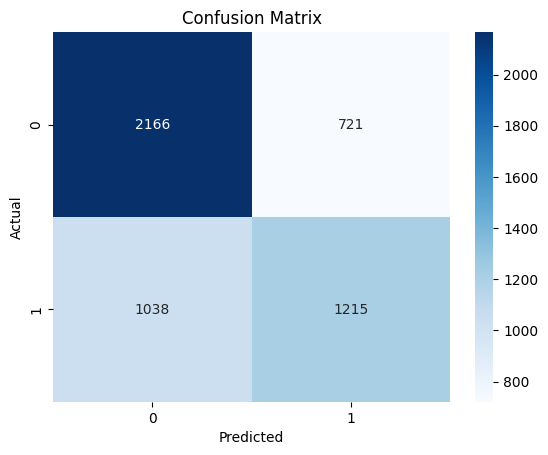

In [148]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [149]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.75      0.71      2887
         1.0       0.63      0.54      0.58      2253

    accuracy                           0.66      5140
   macro avg       0.65      0.64      0.65      5140
weighted avg       0.65      0.66      0.65      5140



In [150]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=model,n_estimators=21)

model_bagg.fit(X_sm,Y_sm)

y_hat_bagg=model_bagg.predict(X_test)

In [151]:
Y_train_bagg=model_bagg.predict(X_train)
f1_train_bagg=f1_score(Y_train,Y_train_bagg,average='weighted')
f1_train_bagg

0.6562782332461611

# Prediction from KNeighbors¶

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
error_rate = []
# Will take some time
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [154]:
error_rate

[0.40175097276264593,
 0.37665369649805447,
 0.38132295719844356,
 0.36517509727626457,
 0.3719844357976654,
 0.3593385214007782,
 0.36186770428015563,
 0.3538910505836576,
 0.3546692607003891,
 0.34766536964980543]

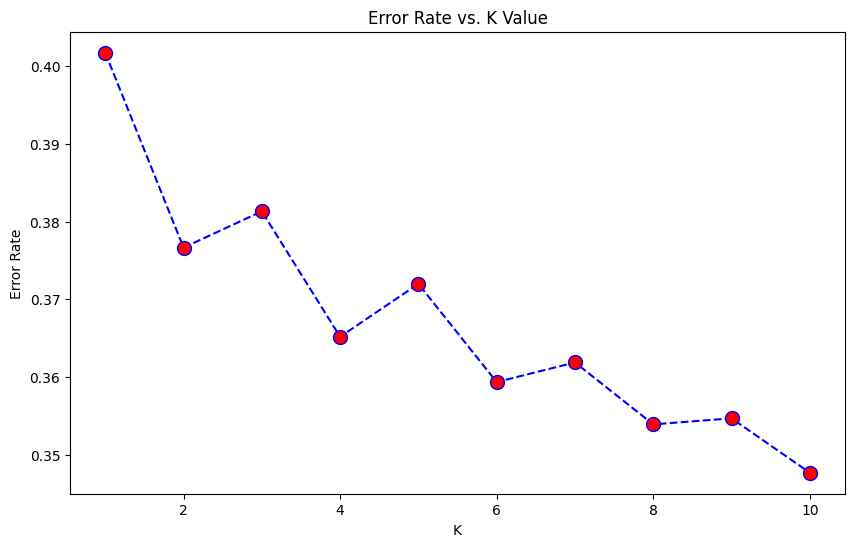

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [156]:
KNN=KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=3)

In [157]:
Y_predict_KNN=KNN.predict(X_test)

In [158]:
Y_predict_KNN

array([0., 0., 0., ..., 0., 0., 1.])

In [159]:

from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
Y_train_KNN=KNN.predict(X_train)
f1_train=f1_score(Y_train,Y_train_KNN,average='weighted')
f1_train

0.7940919283552765

In [160]:
## Checking the outputs
f1_KNN=f1_score(Y_test,Y_predict_KNN,average='weighted')
f1_KNN


0.6161734266319518

##  using bagging base estimator is KNN

In [161]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(estimator=KNN,n_estimators=100)

model_bagg.fit(X_sm,Y_sm)

y_hat_bagg=model_bagg.predict(X_test)

In [162]:
f1_bagg=f1_score(Y_test,y_hat_bagg,average='weighted')

In [163]:
f1_bagg


0.839696522569879

# Support Vector Classifier Model


In [164]:
from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(X_sm, Y_sm)

SVC()

In [165]:
y_pred=svclassifier.predict(X_test)

In [166]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [167]:
ac_svc=accuracy_score(Y_test,y_pred)
ac_svc

0.6577821011673152

### Evaluating the model

In [168]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71      2887
         1.0       0.63      0.54      0.58      2253

    accuracy                           0.66      5140
   macro avg       0.65      0.64      0.65      5140
weighted avg       0.65      0.66      0.65      5140



# Decision Tree Classifier Model

In [169]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0:1,1:5},y=Y_sm)

In [170]:
from sklearn.tree import DecisionTreeClassifier        #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()             #object creation for decision tree
dt.fit(X_sm,Y_sm,sample_weight=sample_weights)       #train the model

DecisionTreeClassifier()

### Evaluating the model

In [171]:
y_predict=dt.predict(X_test)    # predicting the model
acc=accuracy_score(Y_test,y_predict)
acc

1.0

In [172]:
print(classification_report(Y_test,y_predict))              # it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2887
         1.0       1.00      1.00      1.00      2253

    accuracy                           1.00      5140
   macro avg       1.00      1.00      1.00      5140
weighted avg       1.00      1.00      1.00      5140

